<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">Contents: Ensemble Techniques Project
1. [Part-A: Solution](#Part-A:-Solution)
2. [Part-B: Solution](#Part-B:-Solution)

# Part-A: Solution

- **DOMAIN:** Telecom
- **CONTEXT:** A telecom company wants to use their historical customer data to predict behaviour to retain customers. You can analyse all relevant customer data and develop focused customer retention programs.
- **DATA DESCRIPTION:** Each row represents a customer, each column contains customer’s attributes described on the column Metadata. The data set includes information about:
 - Customers who left within the last month – the column is called Churn
 - Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
 - Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
 - Demographic info about customers – gender, age range, and if they have partners and dependents
- **PROJECT OBJECTIVE:** To Build a model that will help to identify the potential customers who have a higher probability to churn. This helps the company to understand the pinpoints and patterns of customer churn and will increase the focus on strategizing customer retention.

In [1]:
# Import all the relevant libraries needed to complete the analysis, visualization, modeling and presentation
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline

from scipy import stats
from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import plot_importance

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

C:\Anaconda\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


## 1. Data Understanding and Exploration:

### 1A. Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable.

In [2]:
# CSV File 1
dfa1=pd.read_csv('TelcomCustomer-Churn_1.csv')

In [3]:
dfa1.info()
dfa1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   customerID       7043 non-null   object
 1   gender           7043 non-null   object
 2   SeniorCitizen    7043 non-null   int64 
 3   Partner          7043 non-null   object
 4   Dependents       7043 non-null   object
 5   tenure           7043 non-null   int64 
 6   PhoneService     7043 non-null   object
 7   MultipleLines    7043 non-null   object
 8   InternetService  7043 non-null   object
 9   OnlineSecurity   7043 non-null   object
dtypes: int64(2), object(8)
memory usage: 550.4+ KB


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  
0  No phone service             DSL             No  
1                No             DSL            Yes  
2                No             DSL            Yes  
3  No phone service             DSL            Yes  
4                No     Fiber optic             No

### 1B. Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable.

In [4]:
# CSV File 2
dfa2=pd.read_csv('TelcomCustomer-Churn_2.csv')

In [5]:
dfa2.info()
dfa2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   OnlineBackup      7043 non-null   object 
 2   DeviceProtection  7043 non-null   object 
 3   TechSupport       7043 non-null   object 
 4   StreamingTV       7043 non-null   object 
 5   StreamingMovies   7043 non-null   object 
 6   Contract          7043 non-null   object 
 7   PaperlessBilling  7043 non-null   object 
 8   PaymentMethod     7043 non-null   object 
 9   MonthlyCharges    7043 non-null   float64
 10  TotalCharges      7043 non-null   object 
 11  Churn             7043 non-null   object 
dtypes: float64(1), object(11)
memory usage: 660.4+ KB


customerID OnlineBackup DeviceProtection TechSupport StreamingTV  \
0  7590-VHVEG          Yes               No          No          No   
1  5575-GNVDE           No              Yes          No          No   
2  3668-QPYBK          Yes               No          No          No   
3  7795-CFOCW           No              Yes         Yes          No   
4  9237-HQITU           No               No          No          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0              No  Month-to-month              Yes           Electronic check   
1              No        One year               No               Mailed check   
2              No  Month-to-month              Yes               Mailed check   
3              No        One year               No  Bank transfer (automatic)   
4              No  Month-to-month              Yes           Electronic check   

   MonthlyCharges TotalCharges Churn  
0           29.85        29.85    No  
1           56.95       1889.5    No  
2           53.85       108.15   Yes  
3           42.30      1840.75    No  
4           70.70       151.65   Yes

### 1C. Merge both the DataFrames on key ‘customerID’ to form a single DataFrame

In [6]:
# customerID is common in both the dataframes
dfa=dfa1.merge(dfa2, left_on='customerID', right_on='customerID')

In [7]:
dfa.info()
dfa.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

### 1D. Verify if all the columns are incorporated in the merged DataFrame by using simple comparison Operator in Python.

In [8]:
# By default, pd.merge gives you an inner merge so you only see the matched.
# Approach 1 is to do instead an outer merge
# And check which rows have np.nan for identifying those that could have missed out from an inner merge:

option1 = dfa1.merge(dfa2, on='customerID', how='outer')

In [9]:
print(option1[option1.isna().any(axis=1)])

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]


In [10]:
dfa.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## 2. Data Cleaning & Analysis:

### 2A. Impute missing/unexpected values in the DataFrame.
(This part will continue in 2B)

In [11]:
# Percentage of missing values

# df.isnull().sum()
# df.isna().sum()

def missing_check(df):
    total = df.isnull().sum().sort_values(ascending=False)   # total number of null values
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)  # percentage of values that are null
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # putting the above two together
    return missing_data # return the dataframe
missing_check(dfa)

Total  Percent
customerID            0      0.0
DeviceProtection      0      0.0
TotalCharges          0      0.0
MonthlyCharges        0      0.0
PaymentMethod         0      0.0
PaperlessBilling      0      0.0
Contract              0      0.0
StreamingMovies       0      0.0
StreamingTV           0      0.0
TechSupport           0      0.0
OnlineBackup          0      0.0
gender                0      0.0
OnlineSecurity        0      0.0
InternetService       0      0.0
MultipleLines         0      0.0
PhoneService          0      0.0
tenure                0      0.0
Dependents            0      0.0
Partner               0      0.0
SeniorCitizen         0      0.0
Churn                 0      0.0

In [12]:
# Get a list of categories of categorical variable
print(dfa.gender.value_counts())
print(dfa.SeniorCitizen.value_counts())
print(dfa.Partner.value_counts())
print(dfa.Dependents.value_counts())
print(dfa.tenure.value_counts())
print(dfa.PhoneService.value_counts())
print(dfa.MultipleLines.value_counts())
print(dfa.InternetService.value_counts())
print(dfa.OnlineSecurity.value_counts())
print(dfa.OnlineBackup.value_counts())
print(dfa.DeviceProtection.value_counts())
print(dfa.TechSupport.value_counts())
print(dfa.StreamingTV.value_counts())
print(dfa.StreamingMovies.value_counts())
print(dfa.Contract.value_counts())
print(dfa.PaperlessBilling.value_counts())
print(dfa.PaymentMethod.value_counts())
print(dfa.MonthlyCharges.value_counts())
print(dfa.TotalCharges.value_counts())
print(dfa.Churn.value_counts())

Male      3555
Female    3488
Name: gender, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
No     3641
Yes    3402
Name: Partner, dtype: int64
No     4933
Yes    2110
Name: Dependents, dtype: int64
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
Yes    6361
No      682
Name: PhoneService, dtype: int64
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64
No            

### 2B. Make sure all the variables with continuous values are of ‘Float’ type.
For Example: MonthlyCharges, TotalCharges

In [13]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
dfa.head().T

0             1               2  \
customerID              7590-VHVEG    5575-GNVDE      3668-QPYBK   
gender                      Female          Male            Male   
SeniorCitizen                    0             0               0   
Partner                        Yes            No              No   
Dependents                      No            No              No   
tenure                           1            34               2   
PhoneService                    No           Yes             Yes   
MultipleLines     No phone service            No              No   
InternetService                DSL           DSL             DSL   
OnlineSecurity                  No           Yes             Yes   
OnlineBackup                   Yes            No             Yes   
DeviceProtection                No           Yes              No   
TechSupport                     No            No              No   
StreamingTV                     No            No              No   
StreamingMovies                 No            No              No   
Contract            Month-to-month      One year  Month-to-month   
PaperlessBilling               Yes            No             Yes   
PaymentMethod     Electronic check  Mailed check    Mailed check   
MonthlyCharges               29.85         56.95           53.85   
TotalCharges                 29.85        1889.5          108.15   
Churn                           No            No             Yes   

                                          3                 4  
customerID                       7795-CFOCW        9237-HQITU  
gender                                 Male            Female  
SeniorCitizen                             0                 0  
Partner                                  No                No  
Dependents                               No                No  
tenure                                   45                 2  
PhoneService                             No               Yes  
MultipleLines              No phone service                No  
InternetService                         DSL       Fiber optic  
OnlineSecurity                          Yes                No  
OnlineBackup                             No                No  
DeviceProtection                        Yes                No  
TechSupport                             Yes                No  
StreamingTV                              No                No  
StreamingMovies                          No                No  
Contract                           One year    Month-to-month  
PaperlessBilling                         No               Yes  
PaymentMethod     Bank transfer (automatic)  Electronic check  
MonthlyCharges                         42.3              70.7  
TotalCharges                        1840.75            151.65  
Churn                                    No               Yes

In [15]:
# Change the Datatype of quantitative features
col_cat=['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
    
#Function to convert the categorical to quantitative
def convert_to_cont(feature):
    dfa[feature]=pd.to_numeric(dfa[feature], errors='coerce')
    
for c in col_cat:
    convert_to_cont(c)

In [16]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [17]:
dfa.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [18]:
dfa.fillna(dfa.mean(),inplace = True)

In [19]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
# CustomerID is the id of the customer with corresponding details. This information may not be requried
# for analysis and modeling as the customerID will be all unique values. So we can drop it safely.
dfa.drop(['customerID'], axis=1, inplace=True)

In [21]:
dfa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Quick EDA

In [22]:
# Describe function generates descriptive statistics that summarize the central tendency, 
# dispersion and shape of a dataset’s distribution, excluding NaN values.

# This method tells us a lot of things about a dataset. One important thing is that 
# the describe() method deals only with numeric values. It doesn't work with any 
# categorical values. So if there are any categorical values in a column the describe() 
# method will ignore it and display summary for the other columns.
dfa.describe().T

count         mean          std    min      25%      50%  \
SeniorCitizen   7043.0     0.162147     0.368612   0.00    0.000     0.00   
tenure          7043.0    32.371149    24.559481   0.00    9.000    29.00   
MonthlyCharges  7043.0    64.761692    30.090047  18.25   35.500    70.35   
TotalCharges    7043.0  2283.300441  2265.000258  18.80  402.225  1400.55   

                    75%      max  
SeniorCitizen      0.00     1.00  
tenure            55.00    72.00  
MonthlyCharges    89.85   118.75  
TotalCharges    3786.60  8684.80

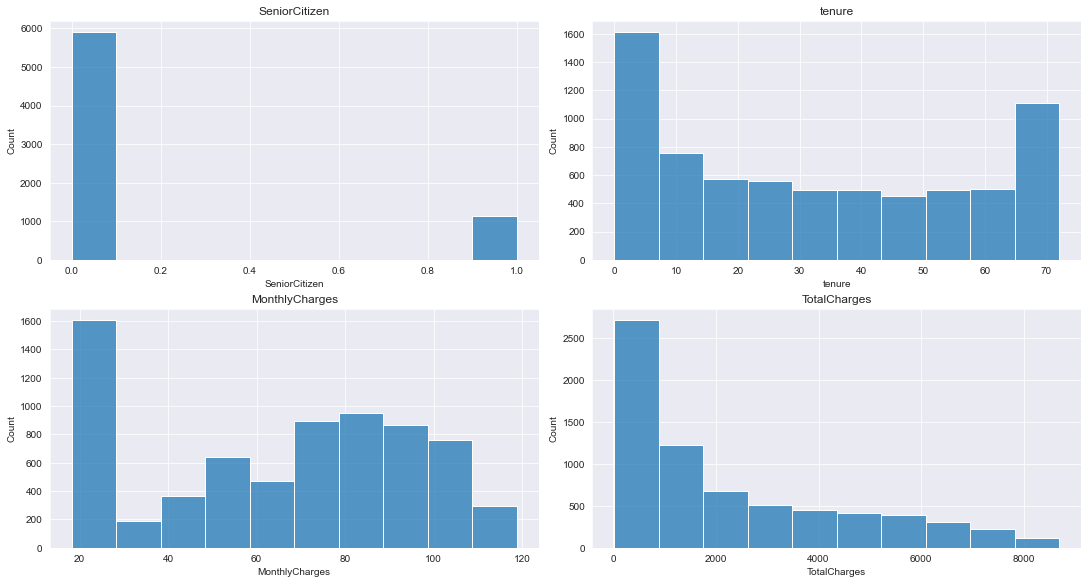

In [23]:
# Distribution of Continuous Features
int_feat = dfa.select_dtypes(exclude=['object','category']).columns
fig, ax = plt.subplots(nrows=2, ncols = 2, figsize=(15,8), constrained_layout=True)
ax=ax.flatten()
for c,i in enumerate(int_feat):
    sns.histplot(dfa[i], ax=ax[c], bins=10)
    ax[c].set_title(i)

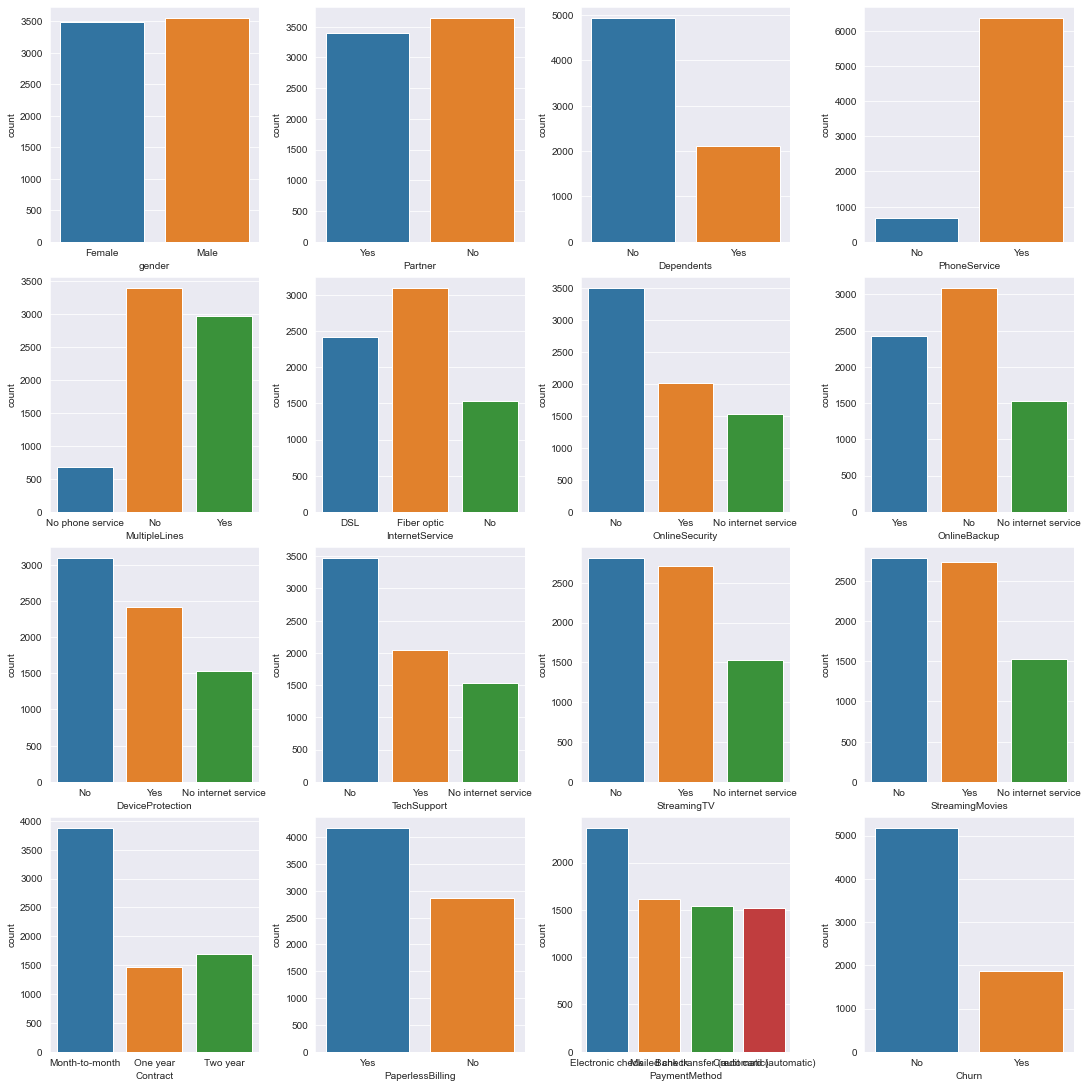

In [24]:
# Distribution of Categorical Features
cat_cols = dfa.select_dtypes(include=['object','category']).columns
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(15,15), constrained_layout=True)
ax=ax.flatten()
for x,i in enumerate(cat_cols):
    sns.countplot(x=dfa[i], ax=ax[x])

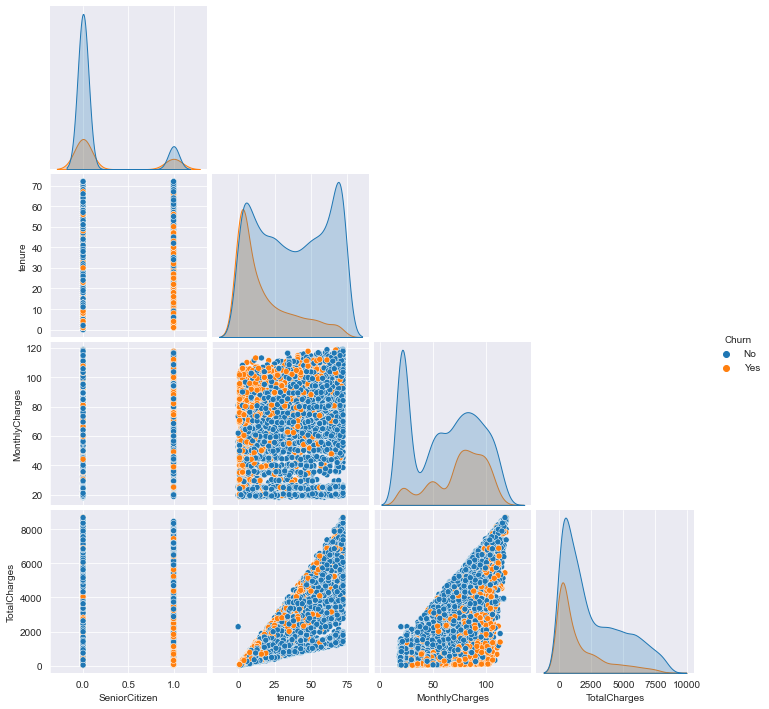

In [25]:
# Visualize a pairplot with 2 classes distinguished by colors
sns.pairplot(dfa,hue='Churn', corner=True )

<AxesSubplot:>

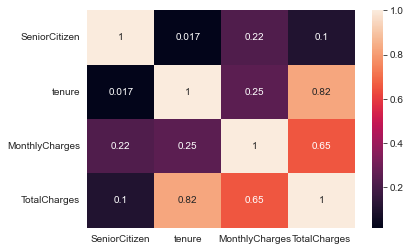

In [26]:
sns.heatmap(dfa.corr(), annot=True)

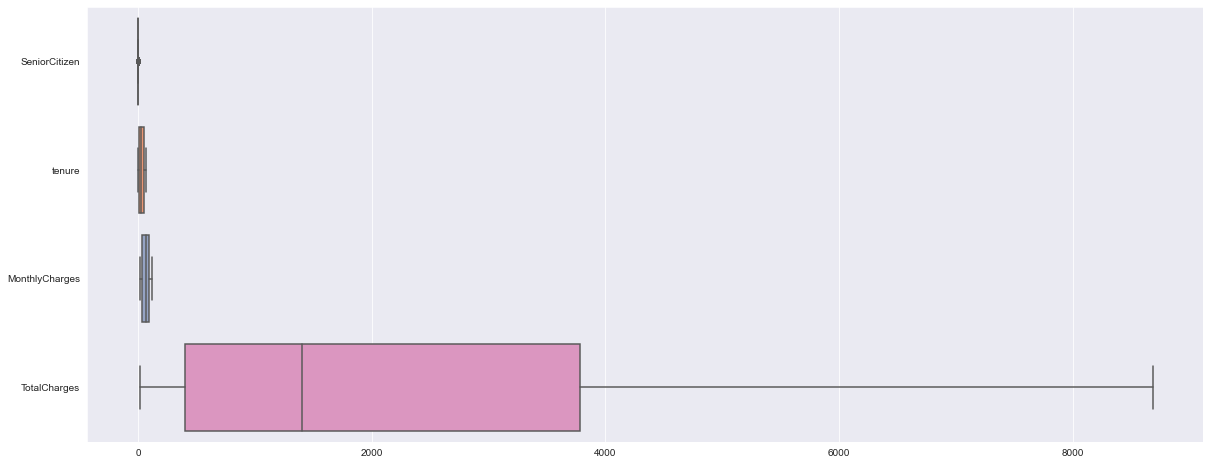

In [27]:
# Box Plot
plt.figure(figsize=(20,8))
ax = sns.boxplot(data=dfa, orient="h", palette="Set2")

In [28]:
# Distribution of Target Variable
count_no_churn = (dfa['Churn'] == 'No').sum()
print("Number of customers who didn't churn:",count_no_churn)
count_yes_churn = (dfa['Churn']== 'Yes').sum()
print("Number of customers who churned:",count_yes_churn)

Number of customers who didn't churn: 5174
Number of customers who churned: 1869


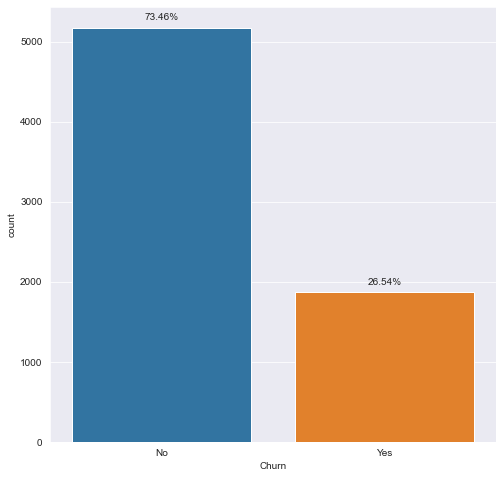

In [29]:
fig, ax = plt.subplots(figsize=(20,8))
width = len(dfa['Churn'].unique())+6
fig.set_size_inches(width , 8)
ax=sns.countplot(data = dfa, x= 'Churn') 

for p in ax.patches: 
    ax.annotate(str((np.round(p.get_height()/len(dfa)*100,decimals=2)))+'%', 
    (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', 
    xytext=(0, 10), textcoords='offset points')


**Imbalanced dataset:**

- The Target variable is not equally distributed, only 26.54% of customers have Churned.
- The model may be biased towards the majority class i.e. Not Churned Customers.
- Data can be balanced using the SMOTE.

### 2C. Create a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly show percentage distribution in the pie-chart

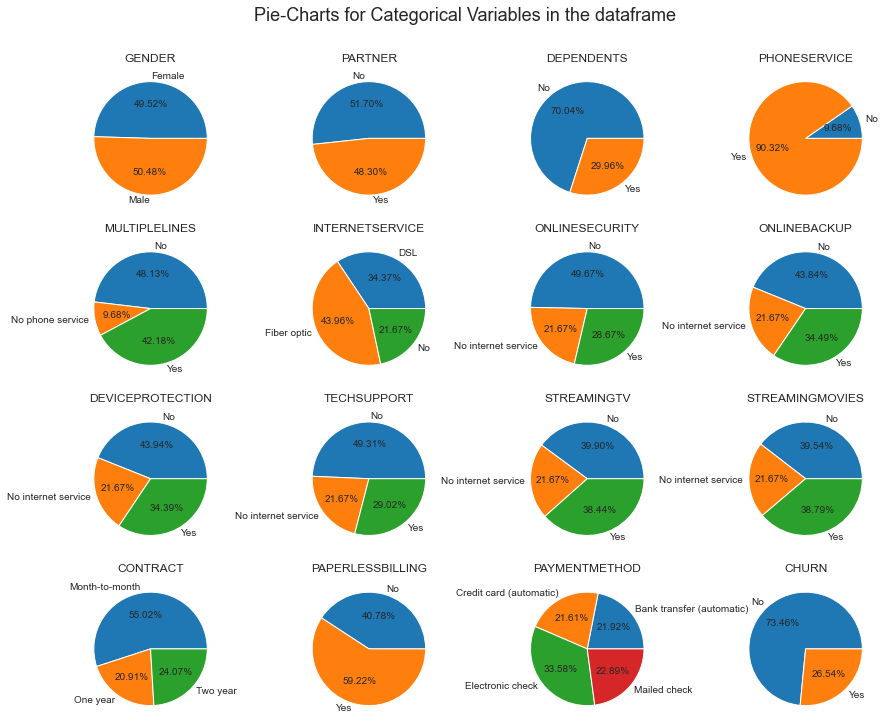

In [30]:
#Function to plot Pie-Charts for all categorical variables in the dataframe
def pie_charts_for_CategoricalVar(df,m):
    '''Takes in a dataframe(df_pie) and plots pie charts for all categorical 
    columns. m = number of columns required in grid'''
    
    #get all the column names in the dataframe
    a = []
    for i in df:
        a.append(i)
    
    #isolate the categorical variable names from a to b
    b = []
    for i in a:
        if (df[i].dtype.name) == 'object':
            b.append(i)
        
    plt.figure(figsize=(15, 12))
    plt.subplots_adjust(hspace=0.2)
    plt.suptitle("Pie-Charts for Categorical Variables in the dataframe", fontsize=18, y=0.95)
    
    # number of columns, as inputted while calling the function
    ncols = m
    # calculate number of rows
    nrows = len(b) // ncols + (len(b) % ncols > 0)
    
    # loop through the length of 'b' and keep track of index
    for n, i in enumerate(b):
        # add a new subplot iteratively using nrows and ncols
        ax = plt.subplot(nrows, ncols, n + 1)

        # filter df and plot 'i' on the new subplot axis
        df.groupby(i).size().plot(kind='pie', autopct='%.2f%%',ax=ax)
        
        ax.set_title(i.upper())
        ax.set_xlabel("")
        ax.set_ylabel("")
    plt.show()

pie_charts_for_CategoricalVar(dfa,4)

### 2D. Share insights for Q2.C.

**Insights from the above pie charts:**
1. Most Features are not having the equitable distribution of various classes: Dependents, PhoneService, MultipleLines, TechSupport, StreamingTV,StreamingMovies, Contract, PaperlessBilling, Churn Etc.
2. Very few features have a balanced or almost balanced distributions of various classes: Gender, Partner, PaymentMethod Etc.
3. There is huge imbalance in target vector i.e. Churn:

If the imbalanced data is not treated beforehand, then this will degrade the performance of the ML model. Most of the predictions will correspond to the majority class and treat the minority class of features as noise in the data and ignore them. This results in a high bias and low performance of the model.

A widely adopted technique for dealing with highly unbalanced datasets is called re-sampling.

**Two widely used re-sampling methods are:**

- Under-sampling: It is the process where you randomly delete some of the observations from the majority class in order to match the numbers with the minority class.

- Over-sampling: It is the process of generating synthetic data that tries to randomly generate a sample of the attributes from observations in the minority class

- Here we will use oversampling because under-sampling may remove important information from the dataset

### 2E. Encode all the appropriate Categorical features with the best suitable approach.

**There are a lot of Yes/No values, we can replace them with 1 or 0:**

- PhoneService - is the telephone service connected (Yes, No) - (1,0)
- MultipleLines - are multiple phone lines connected (Yes, No, No phone service) - (1,0,0)
- InternetService - client's Internet service provider (DSL, Fiber optic, No) -(2,1,0)
- OnlineSecurity - is the online security service connected (Yes, No, No internet service)-(1,0,0)
- OnlineBackup - is the online backup service activated (Yes, No, No internet service)-(1,0,0)
- DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)-(1,0,0)
- TechSupport - is the technical support service connected (Yes, No, No internet service)-(1,0,0)
- StreamingTV - is the streaming TV service connected (Yes, No, No internet service)-(1,0,0)
- StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)-(1,0,0)
- Contract - type of customer contract (Month-to-month, One year, Two year) - (month-to-month - 1, One Year - 12, Two Year = 24)
- PaperlessBilling - whether the client uses paperless billing (Yes, No) - (1,0)
- PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges - current monthly payment
- TotalCharges - the total amount that the client paid for the services for the entire time
- Churn - whether there was a churn (Yes or No) - (1,0)

In [31]:
# Feature engineering - convert the object features to integer based on the category
dfa=dfa.replace('Yes',1)
dfa=dfa.replace('No',0)
dfa=dfa.replace('No internet service',0)
dfa=dfa.replace('No phone service',0)
dfa=dfa.replace('Fiber optic',2)
dfa=dfa.replace('DSL',1)
dfa=dfa.replace('Male',1)
dfa=dfa.replace('Female',0)
dfa=pd.get_dummies(data=dfa, columns=['Contract','PaymentMethod'],drop_first=True )

In [32]:
dfa.head()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        1           0       1             0   
1       1              0        0           0      34             1   
2       1              0        0           0       2             1   
3       1              0        0           0      45             0   
4       0              0        0           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0              0                1               0             1  ...   
1              0                1               1             0  ...   
2              0                1               1             1  ...   
3              0                1               1             0  ...   
4              0                2               0             0  ...   

   StreamingMovies  PaperlessBilling  MonthlyCharges  TotalCharges  Churn  \
0                0                 1           29.85         29.85      0   
1                0                 0           56.95       1889.50      0   
2                0                 1           53.85        108.15      1   
3                0                 0           42.30       1840.75      0   
4                0                 1           70.70        151.65      1   

   Contract_One year  Contract_Two year  \
0                  0                  0   
1                  1                  0   
2                  0                  0   
3                  1                  0   
4                  0                  0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  
0                           0  
1                           1  
2                           1  
3                           0  
4                           0  

[5 rows x 23 columns]

### 2F. Split the data into 80% train and 20% test.

In [33]:
# Create the features matrix and target vector
X=dfa.drop(['Churn'], axis=1)
y=dfa['Churn']

In [34]:
# Check for imbalanced dataset by numbers
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [35]:
# Check for imbalanced dataset by percentage
1869/5174*100

36.122922303826826

In [36]:
# Split the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 2G. Normalize/Standardize the data with the best suitable approach.

In [37]:
# Using different scaling methods:
# scaler = RobustScaler()
# scaler = MinMaxScaler()
scaler = StandardScaler()

cols_to_scale = ["MonthlyCharges","TotalCharges","tenure"]

X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

In [38]:
X_train.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
2920       0              0        1           0  1.612532             1   
2966       0              1        0           0 -0.747907             0   
6099       0              0        1           1  1.571835             1   
5482       1              0        1           1  0.025340             1   
2012       0              0        1           0  0.595101             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
2920              0                1               1             1  ...   
2966              0                1               0             0  ...   
6099              1                0               0             0  ...   
5482              0                1               0             0  ...   
2012              1                2               1             1  ...   

      StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  \
2920            1                1                 0        0.674154   
2966            1                1                 1       -0.614894   
6099            0                0                 0       -1.335097   
5482            1                1                 1        0.301578   
2012            1                0                 1        1.128231   

      TotalCharges  Contract_One year  Contract_Two year  \
2920      1.704560                  0                  1   
2966     -0.711711                  0                  0   
6099     -0.210251                  0                  1   
5482      0.051750                  1                  0   
2012      0.989863                  0                  0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
2920                                      0                               0   
2966                                      0                               1   
6099                                      0                               0   
5482                                      0                               0   
2012                                      0                               1   

      PaymentMethod_Mailed check  
2920                           1  
2966                           0  
6099                           0  
5482                           1  
2012                           0  

[5 rows x 22 columns]

In [39]:
X_test.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
2200       0              0        0           0 -0.544421             1   
4627       1              0        0           0  1.124165             1   
3225       0              0        0           0 -0.788605             1   
2828       1              0        0           0 -1.276971             1   
3768       0              0        1           0  0.920679             1   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
2200              0                1               0             1  ...   
4627              1                2               1             1  ...   
3225              0                1               1             0  ...   
2828              0                0               0             0  ...   
3768              1                2               0             1  ...   

      StreamingTV  StreamingMovies  PaperlessBilling  MonthlyCharges  \
2200            1                0                 0       -0.220695   
4627            1                1                 1        1.722025   
3225            1                1                 1        0.236709   
2828            0                0                 0       -1.476477   
3768            0                0                 1        0.429651   

      TotalCharges  Contract_One year  Contract_Two year  \
2200     -0.547525                  1                  0   
4627      2.098597                  1                  0   
3225     -0.601027                  0                  0   
2828     -0.999163                  0                  1   
3768      0.872062                  0                  0   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
2200                                      0                               1   
4627                                      1                               0   
3225                                      0                               1   
2828                                      0                               0   
3768                                      1                               0   

      PaymentMethod_Mailed check  
2200                           0  
4627                           0  
3225                           0  
2828                           1  
3768                           0  

[5 rows x 22 columns]

In [40]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(5634, 22) (1409, 22)
(5634,) (1409,)


## 3. Model building and Improvement:

### 3A. Train a model using XGBoost. Also print best performing parameters along with train and test performance.
Base model is created in 3A, and the parameter tuning is done in 3B. Considering both part 3A and 3B here.

In [41]:
# Build the model
model = xgb.XGBClassifier(n_jobs=2, random_state=0, verbosity=0)

# Train the model
model.fit(X_train, y_train)
model_pred = model.predict(X_test)

Accuracy on Training data: 0.9435569755058573
Accuracy on Test data: 0.7778566359119943
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85      1041
           1       0.59      0.49      0.53       368

    accuracy                           0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.77      0.78      0.77      1409

Confusion Matrix Chart:


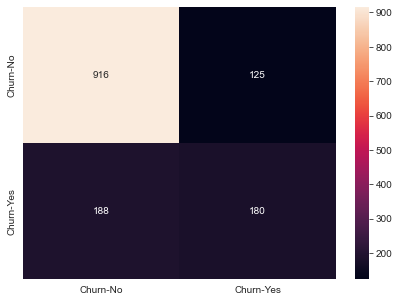

In [42]:
# Classification Accuracy
print('Accuracy on Training data:',model.score(X_train, y_train))
print('Accuracy on Test data:',model.score(X_test, y_test))

# Classification Report
print("Classification Report:\n",classification_report(y_test, model_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, model_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Churn-No","Churn-Yes"]],
                  columns = [i for i in ["Churn-No","Churn-Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

In [43]:
# Default Parameters used in the base model:
print(model)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)


### 3B. Improve performance of the XGBoost as much as possible. Also print best performing parameters along with train and test performance.

#### Case-1: Using oversampling over complete dataset

In [44]:
print('Before oversampling distribution of target vector:')
print(y.value_counts())

Before oversampling distribution of target vector:
0    5174
1    1869
Name: Churn, dtype: int64


In [45]:
# Using SMOTE
# Create the oversampler. 
smote=SMOTE(random_state=0)
X1, y1=smote.fit_resample(X, y)

In [46]:
# Target vector is balanced after oversampling
print('After oversampling distribution of target vector:')
print(y1.value_counts())

After oversampling distribution of target vector:
0    5174
1    5174
Name: Churn, dtype: int64


In [47]:
# Split X and y into training and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.20, random_state=0)

In [48]:
# Build the model
model = xgb.XGBClassifier(n_jobs=2, random_state=0, verbosity=0)

# Train the model
model.fit(X_train, y_train)
model_pred = model.predict(X_test)

Accuracy on Training data: 0.9544575984537328
Accuracy on Test data: 0.8396135265700483
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.82      0.84      1033
           1       0.83      0.86      0.84      1037

    accuracy                           0.84      2070
   macro avg       0.84      0.84      0.84      2070
weighted avg       0.84      0.84      0.84      2070

Confusion Matrix Chart:


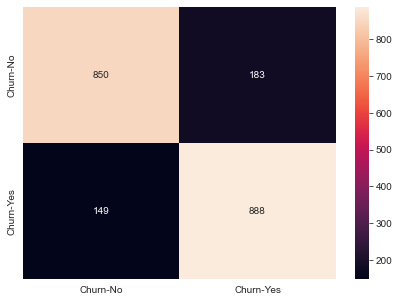

In [49]:
# Classification Accuracy
print('Accuracy on Training data:',model.score(X_train, y_train))
print('Accuracy on Test data:',model.score(X_test, y_test))

# Classification Report
print("Classification Report:\n",classification_report(y_test, model_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, model_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Churn-No","Churn-Yes"]],
                  columns = [i for i in ["Churn-No","Churn-Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

#### Case-2: Using oversampling over training dataset only

In [50]:
# Split X and y into training and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [51]:
# Using SMOTE
# Create the oversampler.
smote=SMOTE(random_state=0)
X1, y1=smote.fit_resample(X_train, y_train)

In [52]:
# Build the model
model = xgb.XGBClassifier(n_jobs=2, random_state=0, verbosity=0)

# Train the model
model.fit(X1, y1)
model_pred = model.predict(X_test)

Accuracy on Training data: 0.9391196308129216
Accuracy on Test data: 0.7622427253371186
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84      1041
           1       0.54      0.58      0.56       368

    accuracy                           0.76      1409
   macro avg       0.69      0.70      0.70      1409
weighted avg       0.77      0.76      0.76      1409

Confusion Matrix Chart:


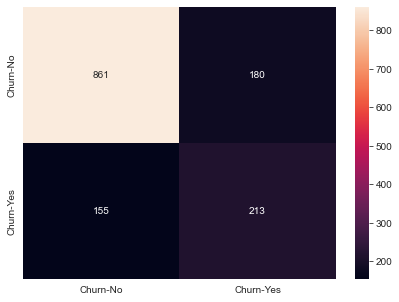

In [53]:
# Classification Accuracy
print('Accuracy on Training data:',model.score(X_train, y_train))
print('Accuracy on Test data:',model.score(X_test, y_test))

# Classification Report
print("Classification Report:\n",classification_report(y_test, model_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, model_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Churn-No","Churn-Yes"]],
                  columns = [i for i in ["Churn-No","Churn-Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

**Evaluation metrics allow us to estimate errors to determine how well our models
are performing:**

> Accuracy: ratio of correct predictions over total predictions.

> Precision: how often the classifier is correct when it predicts positive.

> Recall: how often the classifier is correct for all positive instances.

> F-Score: single measurement to combine precision and recall.

**Considering the Prediction of customer churn (Recall) as the most important parameter to decide the best model for this problem. We have the highest Recall value here:**
- Class 0 predicted correctly for 85% of time. On similar lines for class 1 its 54%.
- Using F1 Score: Precision and Recall is balanced for class 0 by 84% and for class 1 by 56%.
- Precision, Recall, and F1 Score are highest for class 0 followed by class 1.
- We have maximum F1 score for class 0, and minimum for class 1.

#### Case-3: Using hyperparameter tuning with Oversampling

In [54]:
# Build the model
model = xgb.XGBClassifier(n_jobs=2, random_state=0, verbosity=0)

params = {'max_depth': [3, 5, 6, 10, 15, 20],
          'learning_rate': [0.01, 0.1, 0.2, 0.3],
          'subsample': np.arange(0.5, 1.0, 0.1),
          'colsample_bytree': np.arange(0.4, 1.0, 0.1),
          'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
          'n_estimators': [100, 500, 1000],
          'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
          'gamma':[i/10.0 for i in range(0,5)],
          'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
          'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0]}

gs = RandomizedSearchCV(estimator=model, param_distributions=params, cv=5, verbose=10, n_jobs=2, random_state=0)
gs.fit(X1, y1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                        'colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
      

In [55]:
pd.DataFrame({'param': gs.cv_results_["params"], 
              'score mean': gs.cv_results_["mean_test_score"], 
              'score s.d.': gs.cv_results_["std_test_score"],
             'rank': gs.cv_results_["rank_test_score"]})

param  score mean  score s.d.  \
0  {'subsample': 0.8999999999999999, 'reg_lambda'...    0.839235    0.084279   
1  {'subsample': 0.5, 'reg_lambda': 1.0, 'reg_alp...    0.833188    0.088651   
2  {'subsample': 0.8999999999999999, 'reg_lambda'...    0.817454    0.052019   
3  {'subsample': 0.8999999999999999, 'reg_lambda'...    0.834880    0.084013   
4  {'subsample': 0.5, 'reg_lambda': 10.0, 'reg_al...    0.816365    0.049265   
5  {'subsample': 0.7999999999999999, 'reg_lambda'...    0.831129    0.078738   
6  {'subsample': 0.8999999999999999, 'reg_lambda'...    0.839356    0.081076   
7  {'subsample': 0.8999999999999999, 'reg_lambda'...    0.839354    0.074579   
8  {'subsample': 0.6, 'reg_lambda': 5.0, 'reg_alp...    0.834275    0.082426   
9  {'subsample': 0.7999999999999999, 'reg_lambda'...    0.798336    0.030971   

   rank  
0     3  
1     6  
2     8  
3     4  
4     9  
5     7  
6     1  
7     2  
8     5  
9    10

In [56]:
print('Best Parameters:', gs.best_params_, 'mean score: ', gs.best_score_, sep='\n')

Best Parameters:
{'subsample': 0.8999999999999999, 'reg_lambda': 10.0, 'reg_alpha': 1e-05, 'n_estimators': 100, 'min_child_weight': 1.0, 'max_depth': 20, 'learning_rate': 0.3, 'gamma': 0.2, 'colsample_bytree': 0.8999999999999999, 'colsample_bylevel': 0.7}
mean score: 
0.8393557278510875


In [57]:
# Build the model
model = xgb.XGBClassifier(n_jobs=2, random_state=0, subsample=0.899999999999999, reg_lambda=10.0, reg_alpha=1e-05, n_estimators=100, 
                          min_child_weight=1.0, max_depth=20, learning_rate=0.3, gamma=0.2, 
                          colsample_bytree=0.8999999999999999, colsample_bylevel=0.7, verbosity=0)

# Train the model
model.fit(X1, y1)
model_pred = model.predict(X_test)

Accuracy on Training data: 0.9799432019879304
Accuracy on Test data: 0.7622427253371186
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      1041
           1       0.54      0.55      0.55       368

    accuracy                           0.76      1409
   macro avg       0.69      0.69      0.69      1409
weighted avg       0.76      0.76      0.76      1409

Confusion Matrix Chart:


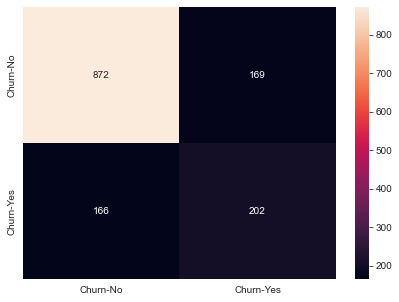

In [58]:
# Classification Accuracy
print('Accuracy on Training data:',model.score(X_train, y_train))
print('Accuracy on Test data:',model.score(X_test, y_test))

# Classification Report
print("Classification Report:\n",classification_report(y_test, model_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, model_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Churn-No","Churn-Yes"]],
                  columns = [i for i in ["Churn-No","Churn-Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

#### Case-4: Using hyperparameter tuning without oversampling

In [59]:
# Build the model
model = xgb.XGBClassifier(n_jobs=2, random_state=0, verbosity=0)

params = {'max_depth': [3, 5, 6, 10, 15, 20],
          'learning_rate': [0.01, 0.1, 0.2, 0.3],
          'subsample': np.arange(0.5, 1.0, 0.1),
          'colsample_bytree': np.arange(0.4, 1.0, 0.1),
          'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
          'n_estimators': [100, 500, 1000],
          'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
          'gamma':[i/10.0 for i in range(0,5)],
          'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100],
          'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0]}

gs = RandomizedSearchCV(estimator=model, param_distributions=params, cv=5, verbose=10, n_jobs=2, random_state=0)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints...
                                        'colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
      

In [60]:
pd.DataFrame({'param': gs.cv_results_["params"], 
              'score mean': gs.cv_results_["mean_test_score"], 
              'score s.d.': gs.cv_results_["std_test_score"],
              'rank': gs.cv_results_["rank_test_score"]})

param  score mean  score s.d.  \
0  {'subsample': 0.8999999999999999, 'reg_lambda'...    0.791622    0.009140   
1  {'subsample': 0.5, 'reg_lambda': 1.0, 'reg_alp...    0.774759    0.008115   
2  {'subsample': 0.8999999999999999, 'reg_lambda'...    0.805112    0.007498   
3  {'subsample': 0.8999999999999999, 'reg_lambda'...    0.785410    0.007893   
4  {'subsample': 0.5, 'reg_lambda': 10.0, 'reg_al...    0.804402    0.008132   
5  {'subsample': 0.7999999999999999, 'reg_lambda'...    0.782924    0.008297   
6  {'subsample': 0.8999999999999999, 'reg_lambda'...    0.790202    0.010668   
7  {'subsample': 0.8999999999999999, 'reg_lambda'...    0.789491    0.015265   
8  {'subsample': 0.6, 'reg_lambda': 5.0, 'reg_alp...    0.789314    0.006103   
9  {'subsample': 0.7999999999999999, 'reg_lambda'...    0.796594    0.008824   

   rank  
0     4  
1    10  
2     1  
3     8  
4     2  
5     9  
6     5  
7     6  
8     7  
9     3

In [61]:
# Print the best parameters
print('Best Parameters:', gs.best_params_, 'mean score: ', gs.best_score_, sep='\n')

Best Parameters:
{'subsample': 0.8999999999999999, 'reg_lambda': 50.0, 'reg_alpha': 0.01, 'n_estimators': 500, 'min_child_weight': 3.0, 'max_depth': 15, 'learning_rate': 0.01, 'gamma': 0.4, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.5}
mean score: 
0.8051118910766097


In [62]:
# Build the model
model = xgb.XGBClassifier(n_jobs=2, random_state=0, subsample=0.899999999999999, reg_lambda=50.0, reg_alpha=0.01, n_estimators=500, 
                          min_child_weight=3.0, max_depth=15, learning_rate=0.01, gamma=0.4, 
                          colsample_bytree=0.4, colsample_bylevel=0.5, verbosity=0)

# Train the model
model.fit(X_train, y_train)
model_pred = model.predict(X_test)

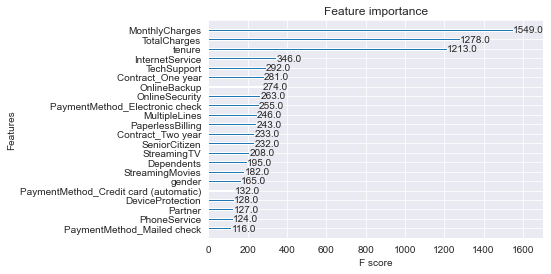

In [63]:
# Plot features importance chart
plot_importance(model)
plt.show()

Accuracy on Training data: 0.8166489172878949
Accuracy on Test data: 0.7920511000709723
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.91      0.87      1041
           1       0.65      0.45      0.53       368

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409

Confusion Matrix Chart:


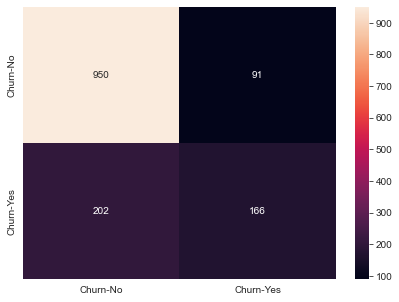

In [64]:
# Classification Accuracy
print('Accuracy on Training data:',model.score(X_train, y_train))
print('Accuracy on Test data:',model.score(X_test, y_test))

# Classification Report
print("Classification Report:\n",classification_report(y_test, model_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, model_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Churn-No","Churn-Yes"]],
                  columns = [i for i in ["Churn-No","Churn-Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

**Refer the Case-2 for best performing model above. Model tuning will continue in Part-B**

# Part-B: Solution

- **DOMAIN:** IT
- **CONTEXT:** The purpose is to build a machine learning workflow that will work autonomously irrespective of Data and users can save efforts involved in building workflows for each dataset.
- **PROJECT OBJECTIVE:** Build a machine learning workflow that will run autonomously with the csv file and return best performing model.

- **STEPS AND TASK:**
 1. Build a simple ML workflow which will accept a single ‘.csv’ file as input and return a trained base model that can be used for predictions. You can use 1 Dataset from Part 1 (single/merged).
 2. Create separate functions for various purposes.
 3. Various base models should be trained to select the best performing model.
 4. Pickle file should be saved for the best performing model.

- **Include best coding practices in the code:**
 - Modularization
 - Maintainability
 - Well commented code etc.

In [65]:
# Import all the relevant libraries needed to complete the analysis, visualization, modeling and presentation
import pandas as pd
import numpy as np
import os

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
%matplotlib inline

from scipy import stats
from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, plot_roc_curve, precision_recall_curve, plot_precision_recall_curve, average_precision_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.svm import SVC

import xgboost as xgb
from xgboost import plot_importance
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTENC
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

## 1. Import and understand the Data:

In [66]:
# Using the complete dataset from Part-A

# CSV File 1
dfa1=pd.read_csv('TelcomCustomer-Churn_1.csv')
# CSV File 2
dfa2=pd.read_csv('TelcomCustomer-Churn_2.csv')
# customerID is common in both the dataframes
dfa=dfa1.merge(dfa2, left_on='customerID', right_on='customerID')

# CustomerID is the id of the customer with corresponding details. This information may not be requried
# for analysis and modeling as the customerID will be all unique values. So we can drop it safely.
dfa.drop(['customerID'], axis=1, inplace=True)

dfa.info()
dfa.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [67]:
dfa.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## 2. Automation of Data Pre-processing Task:

### Clean Data

#### Remove the Missing Data
We need to remove data where the value of any feature is nan or na or empty. Imputation is also a great strategy.

In [68]:
def remove_missing(df) : 
  remove = []
  for i, row in df.iterrows():
    if row.isna().values.any() : remove.append(i)
  df.drop(remove,axis=0,inplace=True)

#### Remove the Mismatch Data
We need to remove data with mismatches: For e.g. a data point with a string value for a numerical feature. For this, we will check what data type is the majority for each feature and remove the data with a different data type for those features.

Provision for exceptions: where we can specify features for which values can have different data types and we do not want to remove mismatches.

In [69]:
def remove_mismatch(df,exceptions=[]) : 
  for col in df : 
    if col in exceptions : continue
    df.reset_index(drop=True, inplace=True)
    s = [False]*len(df[col])
    for i,cell in enumerate(df[col]) : 
      try : n = int(cell)
      except : s[i] = True
    t = s.count(True)
    f = s.count(False)
    st = False
    if(t>f) : st = True
    remove = [i for i in range(len(df[col])) if s[i]!=st]
    df.drop(remove,axis=0,inplace=True)

#### Convert Numeric Data Stored as String to Numerical Form

Sometimes Numeric Data (e.g. int, float) is stored as a String, this may lead to an error when we train our model or normalize our data. We need to identify such cases and convert them to their original numerical forms.

In [70]:
def str_to_num(df) : 
  for col in df : 
    try : df[col] = pd.to_numeric(df[col])
    except : pass

#### Single Function to Clean the Data

In [71]:
def clean(df,exceptions_mismatch=[]) : 
  remove_missing(df) 
  remove_mismatch(df,exceptions=exceptions_mismatch)
  str_to_num(df)

In [72]:
# Example
clean(dfa,exceptions_mismatch=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'])

In [73]:
dfa.info()
dfa.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female              0     Yes         No       1           No   
1    Male              0      No         No      34          Yes   
2    Male              0      No         No       2          Yes   
3    Male              0      No         No      45           No   
4  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

### Encode Data
- Label Encoding: Assign an integer to each unique value of a column/feature.
- One Hot Encoding: Convert 1 column to n columns where n is the number of unique values in that column. Each new column represents a unique value in the original column and it contains either 0 or 1. So in each row, only one of the n columns will have the value 1 and the remaining n-1 columns will have the value 0.

We are going to represent the type of encoding we want for each column using a dictionary, where the keys will be the column/feature names and their values will be the type of encoding we want.

In [74]:
# ‘None’ will mean One Hot Encoding
# ‘[]’ would mean Label Encoding without a given order
# ‘[a,b,c…]’ would mean Label Encoding with the list being the order
labels = {}
labels['gender'] = []
labels['SeniorCitizen'] = []
labels['Partner'] = []
labels['Dependents'] = []
# labels['tenure'] = []
labels['PhoneService'] = [] 
labels['MultipleLines'] = [] 
labels['InternetService'] = []
labels['OnlineSecurity'] = [] 
labels['OnlineBackup'] = []
labels['DeviceProtection'] = [] 
labels['TechSupport'] = []
labels['StreamingTV'] = [] 
labels['StreamingMovies'] = [] 
labels['PaperlessBilling'] = []
# labels['MonthlyCharges'] = [] 
# labels['TotalCharges'] = [] 
labels['Churn'] = []
labels['Contract'] = None
labels['PaymentMethod'] = None

# This way experimenting with different encoding will become very easy. 
# For eg., if we want to change the encoding of the ‘Type’ column from One Hot to Label, 
# we can do it by simply changing its value in the labels dictionary from None to [].

#### Label Encoding
The function takes the column name and order as input.

In [75]:
# Lets say, df['col'] = ['b','a','b','c']

# order = []
 # Label Encoding with no given order
 # df['col'] = [0,1,0,2]
# order = ['a','b','c']
 # Label Encoding with given order
 # df['col'] = [1,0,1,2]
# order = ['a']
 # By giving only a few values in order we can keep remaining values as 'others'
 # df['col'] = [-1,0,-1,-1]

def encode_label(df,col,order=[]) :
  if(order==[]) : order = list(df[col].unique())
  for i,cell in enumerate(df[col]) : 
    try : 
      df.at[i,col] = order.index(df[col][i])
    except : 
      df.at[i,col] = -1

#### One Hot Encoding

In [76]:
# The function takes the column name as input.

# Lets say, df['col'] = ['b','a','b','c']

# After One Hot Encoding -
 # df['col_b'] = [1,0,1,0]
 # df['col_a'] = [0,1,0,0]
 # df['col_c'] = [0,0,0,1]

def encode_onehot(df,col) :
  k = {}
  n = df[col].shape[0]
  unique = df[col].unique()
  for unq in unique : k[unq] = [0]*n
  for i in range(n) :
    k[df.at[i,col]][i] = 1
  for unq in unique : df[f"{col}_{unq}"] = k[unq] 
  df.drop(col,axis=1,inplace=True)

#### Single Function For Encoding Data

In [77]:
def encode(df,cols) : 
  for col in cols.keys() : 
    if(cols[col] is None) : encode_onehot(df,col)
    else : encode_label(df,col,cols[col])

In [78]:
# Example
encode(dfa,labels)

In [79]:
dfa.info()
dfa.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   object 
 3   Dependents                               7043 non-null   object 
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   object 
 6   MultipleLines                            7043 non-null   object 
 7   InternetService                          7043 non-null   object 
 8   OnlineSecurity                           7043 non-null   object 
 9   OnlineBackup                             7043 non-null   object 
 10  DeviceProtection                         7043 no

gender  SeniorCitizen Partner Dependents  tenure PhoneService MultipleLines  \
0      0              0       0          0       1            0             0   
1      1              0       1          0      34            1             1   
2      1              0       1          0       2            1             1   
3      1              0       1          0      45            0             0   
4      0              0       1          0       2            1             1   

  InternetService OnlineSecurity OnlineBackup  ... MonthlyCharges  \
0               0              0            0  ...          29.85   
1               0              1            1  ...          56.95   
2               0              1            0  ...          53.85   
3               0              1            1  ...          42.30   
4               1              0            1  ...          70.70   

  TotalCharges Churn Contract_Month-to-month Contract_One year  \
0        29.85     0                       1                 0   
1       1889.5     0                       0                 1   
2       108.15     1                       1                 0   
3      1840.75     0                       0                 1   
4       151.65     1                       1                 0   

   Contract_Two year PaymentMethod_Electronic check  \
0                  0                              1   
1                  0                              0   
2                  0                              0   
3                  0                              0   
4                  0                              1   

  PaymentMethod_Mailed check  PaymentMethod_Bank transfer (automatic)  \
0                          0                                        0   
1                          1                                        0   
2                          1                                        0   
3                          0                                        1   
4                          0                                        0   

   PaymentMethod_Credit card (automatic)  
0                                      0  
1                                      0  
2                                      0  
3                                      0  
4                                      0  

[5 rows x 25 columns]

In [80]:
# Convert the categorical Data type to Numerical for modeling
col=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'TotalCharges', 'Churn']

def convert_to_cont(feature):
    dfa[feature]=pd.to_numeric(dfa[feature], errors='coerce')
    
for c in col:
    convert_to_cont(c)
    
dfa.fillna(dfa.mean(),inplace = True)

In [81]:
dfa.info()
dfa.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   InternetService                          7043 non-null   int64  
 8   OnlineSecurity                           7043 non-null   int64  
 9   OnlineBackup                             7043 non-null   int64  
 10  DeviceProtection                         7043 no

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       0              0        0           0       1             0   
1       1              0        1           0      34             1   
2       1              0        1           0       2             1   
3       1              0        1           0      45             0   
4       0              0        1           0       2             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0              0                0               0             0  ...   
1              1                0               1             1  ...   
2              1                0               1             0  ...   
3              0                0               1             1  ...   
4              1                1               0             1  ...   

   MonthlyCharges  TotalCharges  Churn  Contract_Month-to-month  \
0           29.85         29.85      0                        1   
1           56.95       1889.50      0                        0   
2           53.85        108.15      1                        1   
3           42.30       1840.75      0                        0   
4           70.70        151.65      1                        1   

   Contract_One year  Contract_Two year  PaymentMethod_Electronic check  \
0                  0                  0                               1   
1                  1                  0                               0   
2                  0                  0                               0   
3                  1                  0                               0   
4                  0                  0                               1   

   PaymentMethod_Mailed check  PaymentMethod_Bank transfer (automatic)  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        1   
4                           0                                        0   

   PaymentMethod_Credit card (automatic)  
0                                      0  
1                                      0  
2                                      0  
3                                      0  
4                                      0  

[5 rows x 25 columns]

In [82]:
dfa.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)'],
      dtype='object')

### Quick EDA

<AxesSubplot:>

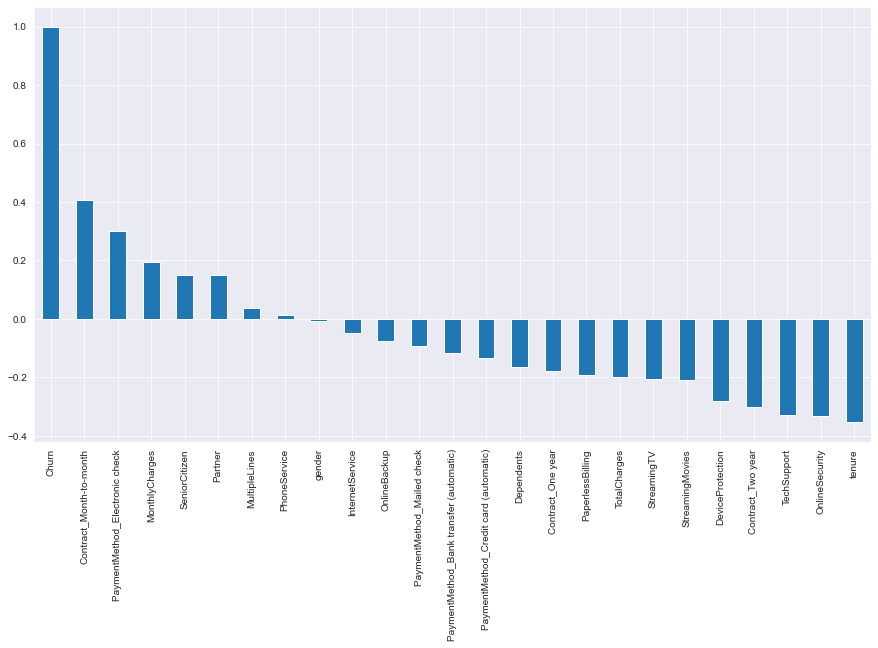

In [83]:
# Correlation of "Churn" with other features
plt.figure(figsize=(15,8))
dfa.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [84]:
# Checking Correlation Heatmap
plt.figure(dpi = 540,figsize= (30,25))
mask = np.triu(np.ones_like(dfa.corr()))
sns.heatmap(dfa.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

### Normalize Data
- Divide by Largest: Divide all the values in a column by the largest value in that column
- Divide by Constant: Divide all the values in a column by a constant value (e.g. 255 in case of an image)
- Divide by Constant x Largest: Divide all the values in a column by a given constant x largest value in that column
- Min-Max Normalization: Subtracting the minimum value from all the values in a column and then dividing all the values by the largest value in that column (new min will be 0 and new max will be 1)
- Mean Normalization: Subtracting the mean from all the values in a column and then dividing all the values by (largest-smallest).

#### Different Normalization Functions

In [85]:
# Dividing by largest
def normalize_dbl(df,cols,round=None) : 
  if(type(cols)!=list) : cols = [cols]
  for col in cols : 
    l = df[col].max()
    if round is None : df[col] = df[col].div(l)
    else : df[col] = df[col].div(l).round(round)
        
# Dividing by constant
def normalize_dbc(df,cols,round=None,c=1) :
  if(type(cols)!=list) : cols = [cols]
  for col in cols : 
    if round is None : df[col] = df[col].div(c)
    else : df[col] = df[col].div(c).round(round)
        
# Dividing by constant x largest
def normalize_dblc(df,cols,round=None,c=1) :
  if(type(cols)!=list) : cols = [cols]
  for col in cols : 
    l = df[col].max() * c
    if round is None : df[col] = df[col].div(l)
    else : df[col] = df[col].div(l).round(round)
        
# min-max normalization
def normalize_rescale(df,cols,round=None) :
  if(type(cols)!=list) : cols = [cols]
  for col in cols : 
    df[col] = df[col] - df[col].min()
    l = df[col].max()
    if round is None : df[col] = df[col].div(l)
    else : df[col] = df[col].div(l).round(round)
        
# mean normalization
def normalize_mean(df,cols,round=None) :
  if(type(cols)!=list) : cols = [cols]
  for col in cols : 
    mean = df[col].mean()
    l = df[col].max() - df[col].min()
    df[col] = df[col] - mean
    if round is None : df[col] = df[col].div(l)
    else : df[col] = df[col].div(l).round(round)

#### Single Function for Normalizing Data

In [86]:
def normalize(df,cols=None,kinds='dbl',round=None,c=1,exceptions=[]) :
  if(cols is None) : 
    cols = []
    for col in df : 
      if(pd.api.types.is_numeric_dtype(df[col])) : 
        if(max(df[col])>1 or min(df[col])<-1) : 
          if(col not in exceptions) : cols.append(col)
  if(type(cols)!=list) : cols = [cols]
  n = len(cols)
  if(type(kinds)!=list) : kinds = [kinds]*n
  for i,kind in enumerate(kinds) : 
    if(kind=='dbl') : normalize_dbl(df,cols[i],round)
    if(kind=='dbc') : normalize_dbc(df,cols[i],round,c)
    if(kind=='dblc') : normalize_dblc(df,cols[i],round,c)
    if(kind in ['min-max','rescale','scale']) : normalize_rescale(df,cols[i],round)
    if(kind=='mean') : normalize_mean(df,cols[i],round)

In [87]:
# Example

# We can vastly vary the overall normalizations by easily making changes in the 
# parameters of this function when we call it. This helps in experimenting with 
# different normalizations.

# Some examples of various ways in which we can normalize our data using this function

# If we want to normalize all columns (it detects numeric columns)
# normalize(df)

# If we want to normalize and round to 3 decimal places –
# normalize(df,round=3)

# If we want to normalize all columns by a kind other than dividing by largest –
# normalize(df,kinds='mean')

# If we want to normalize some columns with a kind and some columns with other kind –
# normalize(df,['Price','Horsepower'],'dbl')
# normalize(df,['AirBags','Cylinders'],'min-max')
# normalize(df,['RPM'],'dblc',c=1.25)

# OR
# normalize(df,['Price','AirBags','Cylinders','Horsepower','RPM'],['dbl','min-max','min-max','dbl','dblc'],c=1.25)

# If we want to normalize all columns except a few
# normalize(df,kinds='min-max',exceptions=['AirBags','RPM'],round=4)

normalize(dfa, kinds='mean', exceptions=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling','Churn', 'Contract_Month-to-month', 
       'Contract_One year','Contract_Two year', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)'])

In [88]:
dfa.info()
dfa.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   float64
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   InternetService                          7043 non-null   int64  
 8   OnlineSecurity                           7043 non-null   int64  
 9   OnlineBackup                             7043 non-null   int64  
 10  DeviceProtection                         7043 no

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        0           0 -0.435710             0   
1       1              0        1           0  0.022623             1   
2       1              0        1           0 -0.421822             1   
3       1              0        1           0  0.175401             0   
4       0              0        1           0 -0.421822             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0              0                0               0             0  ...   
1              1                0               1             1  ...   
2              1                0               1             0  ...   
3              0                0               1             1  ...   
4              1                1               0             1  ...   

   MonthlyCharges  TotalCharges  Churn  Contract_Month-to-month  \
0       -0.347380     -0.260034      0                        1   
1       -0.077728     -0.045442      0                        0   
2       -0.108574     -0.250998      1                        1   
3       -0.223499     -0.051067      0                        0   
4        0.059088     -0.245979      1                        1   

   Contract_One year  Contract_Two year  PaymentMethod_Electronic check  \
0                  0                  0                               1   
1                  1                  0                               0   
2                  0                  0                               0   
3                  1                  0                               0   
4                  0                  0                               1   

   PaymentMethod_Mailed check  PaymentMethod_Bank transfer (automatic)  \
0                           0                                        0   
1                           1                                        0   
2                           1                                        0   
3                           0                                        1   
4                           0                                        0   

   PaymentMethod_Credit card (automatic)  
0                                      0  
1                                      0  
2                                      0  
3                                      0  
4                                      0  

[5 rows x 25 columns]

### Split Data
We will use sklearn and make a function to split data where we won’t even need to mention if we are splitting our data into 2 or 3 portions.

We also need to reset the index of x_train, x_test, etc., otherwise, we can face problems while iterating over them in the future.

In [89]:
from sklearn.model_selection import train_test_split
X = dfa.drop(['Churn'], axis=1)
y = dfa.loc[:,'Churn']

#### Split-1

In [90]:
def train_test(X,y,train_size=-1,test_size=-1) :

    if(train_size==-1) : train_size = 1-test_size

    X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=train_size,random_state=0)

    X_train.reset_index(drop=True,inplace=True)

    X_test.reset_index(drop=True,inplace=True)

    y_train.reset_index(drop=True,inplace=True)

    y_test.reset_index(drop=True,inplace=True)

    return X_train,X_test,y_train,y_test

#### Split-2

In [91]:
def train_val_test(X,y,train_size=-1,val_size=-1,test_size=-1) :

    if(train_size==-1) : train_size = 1-val_size-test_size

    if(val_size==-1) : val_size = 1-train_size-test_size

    X_train,X_val,y_train,y_val = train_test_split(X,y,train_size=train_size,random_state=0)

    X_val,X_test,y_val,y_test = train_test_split(X_val,y_val,train_size=(val_size/(1-train_size)),random_state=0)

    X_train.reset_index(drop=True,inplace=True)

    X_val.reset_index(drop=True,inplace=True)

    X_test.reset_index(drop=True,inplace=True)

    y_train.reset_index(drop=True,inplace=True)

    y_val.reset_index(drop=True,inplace=True)

    y_test.reset_index(drop=True,inplace=True)

    return X_train,X_val,X_test,y_train,y_val,y_test

#### Single Function for Splitting Data
If we pass two sizes in the function (eg. train_size & val_size) then it will be a three-way split, if we pass one size (eg. train_size) it will be a two-way split.

In [92]:
# Single Function
def split(X,y,train_size=-1,val_size=-1,test_size=-1) :
    if(train_size==-1 and val_size==-1) : return train_test(X,y,train_size=1-test_size)
    if(train_size==-1 and test_size==-1) : return train_test(X,y,train_size=1-val_size)
    if(val_size==-1 and test_size==-1) : return train_test(X,y,train_size=train_size)
    return train_val_test(X,y,train_size,val_size,test_size)

In [93]:
# Example for Split-1
# Train Validation Test Split:
X_train,X_val,X_test,y_train,y_val,y_test = split(X,y,train_size=0.7,val_size=0.15)

In [94]:
print(X_train.shape,X_val.shape,X_test.shape)
print(y_train.shape,y_val.shape,y_test.shape)

(4930, 24) (1056, 24) (1057, 24)
(4930,) (1056,) (1057,)


In [95]:
# Example for Split-2
# Train-Test Split:
X_train,X_test,y_train,y_test = split(X,y,train_size=0.80)

In [96]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(5634, 24) (1409, 24)
(5634,) (1409,)


### Conclusion
**We implemented preprocessing functions for Cleaning, Encoding, Normalizing, and Splitting the Data. We saw how organized preprocessing makes our job easier.**

After Importing the data, we can pre-process it as per our needs in 4 lines. We can keep modifying the parameters to experiment with different preprocessing approaches.
```
clean(df,exceptions_mismatch=[])
encode(df,labels)
normalize(df,cols=None,kinds='dbl',round=None,c=1,exceptions=[])
split(X,y,train_size=-1,val_size=-1,test_size=-1)
```
> Refer the above cells for customization of various parameters of these functions.

In [97]:
# Using the dataset from Part-A
# CSV File 1
dfa1=pd.read_csv('TelcomCustomer-Churn_1.csv')
# CSV File 2
dfa2=pd.read_csv('TelcomCustomer-Churn_2.csv')
# customerID is common in both the dataframes
dfa=dfa1.merge(dfa2, left_on='customerID', right_on='customerID')
# We can safely drop the customerID
dfa.drop(['customerID'], axis=1, inplace=True)

# Stacking all the functions for Cleaning, Encoding, Normalizing, and Splitting the Dataframe
# Single Function for Cleaning Data
clean(dfa,exceptions_mismatch=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'])

# Single Function For Encoding Data
labels = {}
labels['gender'] = []
labels['SeniorCitizen'] = []
labels['Partner'] = []
labels['Dependents'] = []
# labels['tenure'] = []
labels['PhoneService'] = [] 
labels['MultipleLines'] = [] 
labels['InternetService'] = []
labels['OnlineSecurity'] = [] 
labels['OnlineBackup'] = []
labels['DeviceProtection'] = [] 
labels['TechSupport'] = []
labels['StreamingTV'] = [] 
labels['StreamingMovies'] = [] 
labels['PaperlessBilling'] = []
# labels['MonthlyCharges'] = [] 
# labels['TotalCharges'] = [] 
labels['Churn'] = []
labels['Contract'] = None
labels['PaymentMethod'] = None
encode(dfa,labels)

# Convert the categorical Data type to Numerical for modeling
col=['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'TotalCharges', 'Churn']
def convert_to_cont(feature):
    dfa[feature]=pd.to_numeric(dfa[feature], errors='coerce')   
for c in col:
    convert_to_cont(c)
dfa.fillna(dfa.mean(),inplace = True)

# Single Function for Normalizing Data
normalize(dfa, kinds='mean', exceptions=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling','Churn', 'Contract_Month-to-month', 
       'Contract_One year','Contract_Two year', 'PaymentMethod_Electronic check',
       'PaymentMethod_Mailed check', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)'])

# Create the Features Matrix and Target Vector
X = dfa.drop(['Churn'], axis=1)
y = dfa.loc[:,'Churn']

# Single Function for Splitting Data
X_train,X_test,y_train,y_test = split(X,y,train_size=0.80)

In [98]:
print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(5634, 24) (1409, 24)
(5634,) (1409,)


In [99]:
X_train.head()

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
0       0              0        0           0  0.550401             1   
1       0              1        1           0 -0.255155             0   
2       0              0        0           1  0.536512             1   
3       1              0        0           1  0.008734             1   
4       0              0        0           0  0.203178             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
0              1                0               1             0  ...   
1              0                0               0             1  ...   
2              2                2               2             2  ...   
3              1                0               0             1  ...   
4              2                1               1             0  ...   

   PaperlessBilling  MonthlyCharges  TotalCharges  Contract_Month-to-month  \
0                 1        0.202371      0.446815                        0   
1                 0       -0.183201     -0.185853                        1   
2                 1       -0.398624     -0.054552                        0   
3                 0        0.090928      0.014049                        0   
4                 0        0.338192      0.259681                        1   

   Contract_One year  Contract_Two year  PaymentMethod_Electronic check  \
0                  0                  1                               0   
1                  0                  0                               1   
2                  0                  1                               0   
3                  1                  0                               0   
4                  0                  0                               1   

   PaymentMethod_Mailed check  PaymentMethod_Bank transfer (automatic)  \
0                           1                                        0   
1                           0                                        0   
2                           0                                        1   
3                           1                                        0   
4                           0                                        0   

   PaymentMethod_Credit card (automatic)  
0                                      0  
1                                      0  
2                                      0  
3                                      0  
4                                      0  

[5 rows x 24 columns]

In [100]:
y_train.head()

0    0
1    0
2    0
3    1
4    1
Name: Churn, dtype: int64

### Key Takeaways from the Automation of Data Pre-processing task:
**Organized Preprocessing saves time and helps us preprocess different datasets and try different preprocessing without much code change:**

- Data Cleaning: We need to remove (or replace) rows with na/nan values, remove rows with the wrong datatype for any feature, and convert numeric data stored as string format in the CSV/excel file back to its original form.
- Data Encoding: We need to encode data as most ML models require numeric data. We implemented label encoding and one hot encoding.
- Data Normalization: It helps in reducing bias towards a feature, and sometimes reduces computation time. We implemented 5 normalization techniques.
- Data Splitting: We need to split our data into the train portion (for fitting the model) and the testing portion (for evaluating the model). Sometimes, we also split into a third portion – validation, which we use to find optimal parameters for our model.

Other than preprocessing too, it’s good to keep our code organized, it helps in making changes later. We should also try to make universal functions taking the dataset as an argument rather than making hardcoded functions that will work only for the dataset we are using at that time.

## 3. Model Building:

### Simple Machine Learning Work flow
Refer section "Conclusion" above to create Preprocessed X_train, X_test, y_train, y_test from a CSV File.


Accuracy on Training data: 0.9449769258075967
Accuracy on Test data: 0.7757274662881476

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85      1041
           1       0.58      0.51      0.54       368

    accuracy                           0.78      1409
   macro avg       0.71      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409

Confusion Matrix Chart:


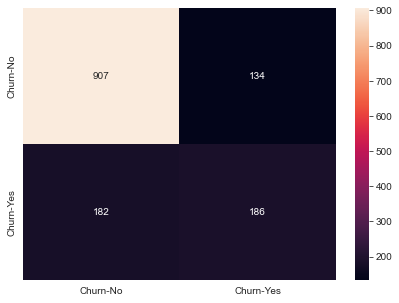

Default Parameters used in the base model:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=2,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=0)


In [101]:
# Build the model
model = xgb.XGBClassifier(n_jobs=2, random_state=0, verbosity=0)

# Train the model
model.fit(X_train, y_train)
model_pred = model.predict(X_test)

# Classification Accuracy
print('')
print('Accuracy on Training data:',model.score(X_train, y_train))
print('Accuracy on Test data:',model.score(X_test, y_test))
print('')

# Classification Report
print("Classification Report:\n",classification_report(y_test, model_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, model_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Churn-No","Churn-Yes"]],
                  columns = [i for i in ["Churn-No","Churn-Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

print('Default Parameters used in the base model:')
print(model)

### Functional Approach: ML work flow template

>10 0.689 (0.048)
>50 0.746 (0.047)
>100 0.748 (0.042)
>500 0.734 (0.043)
>1000 0.723 (0.051)
>5000 0.707 (0.049)


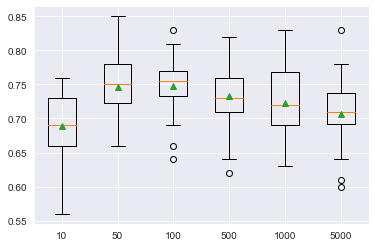

In [102]:
# ML Workflow to select a best performing model
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from matplotlib import pyplot

# Get the dataset
def get_dataset():
	Xm, ym = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=0)
	return Xm, ym

# Get a list of models to evaluate
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500, 1000, 5000]
	for n in n_trees:
		models[str(n)] = AdaBoostClassifier(random_state=0, n_estimators=n)
	return models

# Evaluate a given model using cross-validation
def evaluate_model(model, Xm, ym):
	# define the evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=0)
	# evaluate the model and collect the results
	scores = cross_val_score(model, Xm, ym, scoring='accuracy', cv=cv, n_jobs=2)
	return scores

# Define dataset
Xm, ym = get_dataset()
# Get the models to evaluate
models = get_models()
# Evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# Evaluate the model
	scores = evaluate_model(model, Xm, ym)
	# Store the results
	results.append(scores)
	names.append(name)
	# Summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# Plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

### Select  the best performing model

In [103]:
# Use K-Fold Cross Validation for model selection
# Define various classification models
BaggingClassifier=BaggingClassifier(n_jobs=2, random_state=0)
RandomForest=RandomForestClassifier(n_jobs=2, random_state=0)
AdaBoostClassifier=AdaBoostClassifier(random_state=0)
GBClassifier=GradientBoostingClassifier(random_state=0)
XGBClassifier=xgb.XGBClassifier(n_jobs=2, random_state=0, verbosity = 0)
LGBMClassifier=LGBMClassifier(n_jobs=2, random_state=0)
CatBoostClassifier=CatBoostClassifier(thread_count=2, random_seed=0)

Hybrid = []
Hybrid.append(['RidgeClassifier',RidgeClassifier(random_state=0)])
Hybrid.append(['Logistic Regression',LogisticRegression(n_jobs=2, random_state=0)])
Hybrid.append(['SVM',SVC(random_state=0)])
Hybrid.append(['KNeigbors',KNeighborsClassifier(n_jobs=2)])
Hybrid.append(['GaussianNB',GaussianNB()])
Hybrid.append(['BernoulliNB',BernoulliNB()])
Hybrid.append(['DecisionTree',DecisionTreeClassifier(random_state=0)])

Hybrid_ensemble=VotingClassifier(Hybrid, n_jobs=2)

XGBClassifier: 0.790714 (0.006376)
RandomForest: 0.792561 (0.012951)
AdaBoostClassifier: 0.802217 (0.009586)
GBClassifier: 0.801934 (0.011641)
LGBMClassifier: 0.799233 (0.010807)
CatBoostClassifier: 0.801225 (0.014142)
BaggingClassifier: 0.778360 (0.014293)
Hybrid_ensemble: 0.793697 (0.010147)


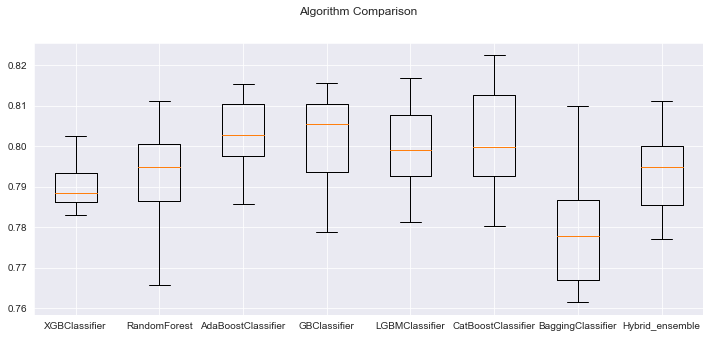

In [104]:
# K Fold Cross Validation Scores

seed = 0

# Create models
models = []
models.append(('XGBClassifier', XGBClassifier))
models.append(('RandomForest', RandomForest))
models.append(('AdaBoostClassifier', AdaBoostClassifier))
models.append(('GBClassifier', GBClassifier))
models.append(('LGBMClassifier', LGBMClassifier))
models.append(('CatBoostClassifier', CatBoostClassifier))
models.append(('BaggingClassifier', BaggingClassifier))
models.append(('Hybrid_ensemble', Hybrid_ensemble))

# Evaluate each model in turn
results = []
names = []

# Use different metrics based on context
scoring = 'accuracy'
# scoring = 'precision'
# scoring = 'recall'
# scoring = 'f1'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,random_state=seed,shuffle=True)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring, n_jobs=2)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
    
# Boxplot for algorithm comparison
fig = plt.figure(figsize=(12,5))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [105]:
# Use SMOTE to handle the imbalanced dataset
# Create the oversampler.
smote=SMOTE(random_state=0)
X1, y1=smote.fit_resample(X_train, y_train)

In [106]:
base_1 = []
for m in range(len(models)):
    base_2 = []
    model = models[m][1]
    model.fit(X1,y1)
    y_pred = model.predict(X_test)
    y1_pred = model.predict(X1)
    cm = confusion_matrix(y_test,y_pred)
    accuracies = cross_val_score(estimator= model, X = X1, y = y1, cv=10)

# k-fOLD Validation
    roc = roc_auc_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1 = f1_score(y_test,y_pred)
    print(models[m][0],':')
    print(cm)
    print('Train Accuracy Score: ',accuracy_score(y1,y1_pred))
    print('Test Accuracy Score: ',accuracy_score(y_test,y_pred))
    print('K-Fold Validation Mean Accuracy: {:.2f} %;'.format(accuracies.mean()*100), 
          'Standard Deviation: {:.2f} %'.format(accuracies.std()*100))
    print('ROC AUC Score: {:.2f} %'.format(roc))
    print('Precision: {:.2f} %'.format(precision))
    print('Recall: {:.2f} %'.format(recall))
    print('F1 Score: {:.2f} %'.format(f1))
    print('Classification Report:')
    print(classification_report(y_test, y_pred)) 
    print('-'*60)
    base_2.append(models[m][0])
    base_2.append(accuracy_score(y1,y1_pred)*100)
    base_2.append(accuracy_score(y_test,y_pred)*100)
    base_2.append(accuracies.mean()*100)
    base_2.append(accuracies.std()*100)
    base_2.append(roc)
    base_2.append(precision)
    base_2.append(recall)
    base_2.append(f1)
    base_1.append(base_2)

XGBClassifier :
[[861 180]
 [139 229]]
Train Accuracy Score:  0.9536656181950157
Test Accuracy Score:  0.7735982966643009
K-Fold Validation Mean Accuracy: 83.54 %; Standard Deviation: 5.09 %
ROC AUC Score: 0.72 %
Precision: 0.56 %
Recall: 0.62 %
F1 Score: 0.59 %
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1041
           1       0.56      0.62      0.59       368

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.77      0.78      1409

------------------------------------------------------------
RandomForest :
[[844 197]
 [136 232]]
Train Accuracy Score:  0.9983063150254052
Test Accuracy Score:  0.7636621717530163
K-Fold Validation Mean Accuracy: 85.11 %; Standard Deviation: 3.09 %
ROC AUC Score: 0.72 %
Precision: 0.54 %
Recall: 0.63 %
F1 Score: 0.58 %
Classification Report:
              precision    recall  f1-sco

123:	learn: 0.4148248	total: 879ms	remaining: 6.21s
124:	learn: 0.4147030	total: 888ms	remaining: 6.22s
125:	learn: 0.4143162	total: 895ms	remaining: 6.21s
126:	learn: 0.4139997	total: 903ms	remaining: 6.2s
127:	learn: 0.4138074	total: 909ms	remaining: 6.2s
128:	learn: 0.4135942	total: 916ms	remaining: 6.18s
129:	learn: 0.4132409	total: 920ms	remaining: 6.16s
130:	learn: 0.4128405	total: 925ms	remaining: 6.13s
131:	learn: 0.4125061	total: 929ms	remaining: 6.11s
132:	learn: 0.4120813	total: 933ms	remaining: 6.08s
133:	learn: 0.4118391	total: 937ms	remaining: 6.05s
134:	learn: 0.4114344	total: 941ms	remaining: 6.03s
135:	learn: 0.4109422	total: 945ms	remaining: 6s
136:	learn: 0.4107058	total: 949ms	remaining: 5.98s
137:	learn: 0.4094147	total: 953ms	remaining: 5.95s
138:	learn: 0.4090584	total: 957ms	remaining: 5.93s
139:	learn: 0.4087688	total: 961ms	remaining: 5.9s
140:	learn: 0.4084166	total: 966ms	remaining: 5.88s
141:	learn: 0.4081504	total: 974ms	remaining: 5.88s
142:	learn: 0.4078

282:	learn: 0.3755242	total: 1.79s	remaining: 4.53s
283:	learn: 0.3754038	total: 1.79s	remaining: 4.52s
284:	learn: 0.3748346	total: 1.8s	remaining: 4.52s
285:	learn: 0.3747233	total: 1.81s	remaining: 4.52s
286:	learn: 0.3745598	total: 1.82s	remaining: 4.51s
287:	learn: 0.3745044	total: 1.82s	remaining: 4.5s
288:	learn: 0.3743975	total: 1.82s	remaining: 4.49s
289:	learn: 0.3741147	total: 1.83s	remaining: 4.48s
290:	learn: 0.3738990	total: 1.83s	remaining: 4.47s
291:	learn: 0.3736450	total: 1.84s	remaining: 4.46s
292:	learn: 0.3733843	total: 1.84s	remaining: 4.45s
293:	learn: 0.3732263	total: 1.85s	remaining: 4.43s
294:	learn: 0.3729841	total: 1.85s	remaining: 4.42s
295:	learn: 0.3726630	total: 1.85s	remaining: 4.41s
296:	learn: 0.3725731	total: 1.86s	remaining: 4.4s
297:	learn: 0.3724906	total: 1.86s	remaining: 4.39s
298:	learn: 0.3720463	total: 1.87s	remaining: 4.39s
299:	learn: 0.3718687	total: 1.88s	remaining: 4.38s
300:	learn: 0.3718020	total: 1.89s	remaining: 4.38s
301:	learn: 0.3

465:	learn: 0.3398971	total: 2.87s	remaining: 3.29s
466:	learn: 0.3397068	total: 2.88s	remaining: 3.29s
467:	learn: 0.3395882	total: 2.89s	remaining: 3.28s
468:	learn: 0.3394617	total: 2.9s	remaining: 3.28s
469:	learn: 0.3393591	total: 2.9s	remaining: 3.27s
470:	learn: 0.3391472	total: 2.91s	remaining: 3.27s
471:	learn: 0.3390436	total: 2.91s	remaining: 3.26s
472:	learn: 0.3389596	total: 2.92s	remaining: 3.25s
473:	learn: 0.3388304	total: 2.92s	remaining: 3.24s
474:	learn: 0.3387336	total: 2.92s	remaining: 3.23s
475:	learn: 0.3385793	total: 2.93s	remaining: 3.22s
476:	learn: 0.3384865	total: 2.93s	remaining: 3.21s
477:	learn: 0.3383416	total: 2.94s	remaining: 3.21s
478:	learn: 0.3380585	total: 2.94s	remaining: 3.2s
479:	learn: 0.3378761	total: 2.94s	remaining: 3.19s
480:	learn: 0.3377617	total: 2.95s	remaining: 3.18s
481:	learn: 0.3376420	total: 2.95s	remaining: 3.17s
482:	learn: 0.3372950	total: 2.96s	remaining: 3.16s
483:	learn: 0.3371267	total: 2.96s	remaining: 3.16s
484:	learn: 0.3

635:	learn: 0.3152839	total: 3.79s	remaining: 2.17s
636:	learn: 0.3151839	total: 3.8s	remaining: 2.16s
637:	learn: 0.3150971	total: 3.8s	remaining: 2.16s
638:	learn: 0.3149649	total: 3.81s	remaining: 2.15s
639:	learn: 0.3148781	total: 3.82s	remaining: 2.15s
640:	learn: 0.3147136	total: 3.82s	remaining: 2.14s
641:	learn: 0.3144972	total: 3.83s	remaining: 2.13s
642:	learn: 0.3143665	total: 3.83s	remaining: 2.13s
643:	learn: 0.3142678	total: 3.84s	remaining: 2.12s
644:	learn: 0.3141931	total: 3.84s	remaining: 2.12s
645:	learn: 0.3140742	total: 3.85s	remaining: 2.11s
646:	learn: 0.3139386	total: 3.85s	remaining: 2.1s
647:	learn: 0.3137997	total: 3.86s	remaining: 2.1s
648:	learn: 0.3137133	total: 3.86s	remaining: 2.09s
649:	learn: 0.3134857	total: 3.87s	remaining: 2.08s
650:	learn: 0.3133135	total: 3.88s	remaining: 2.08s
651:	learn: 0.3131846	total: 3.89s	remaining: 2.08s
652:	learn: 0.3130855	total: 3.89s	remaining: 2.07s
653:	learn: 0.3129845	total: 3.9s	remaining: 2.06s
654:	learn: 0.312

805:	learn: 0.2942769	total: 4.7s	remaining: 1.13s
806:	learn: 0.2939740	total: 4.71s	remaining: 1.13s
807:	learn: 0.2936907	total: 4.71s	remaining: 1.12s
808:	learn: 0.2935975	total: 4.71s	remaining: 1.11s
809:	learn: 0.2935081	total: 4.72s	remaining: 1.11s
810:	learn: 0.2934321	total: 4.72s	remaining: 1.1s
811:	learn: 0.2932978	total: 4.73s	remaining: 1.09s
812:	learn: 0.2932233	total: 4.73s	remaining: 1.09s
813:	learn: 0.2931482	total: 4.74s	remaining: 1.08s
814:	learn: 0.2930120	total: 4.75s	remaining: 1.08s
815:	learn: 0.2929141	total: 4.76s	remaining: 1.07s
816:	learn: 0.2927543	total: 4.77s	remaining: 1.07s
817:	learn: 0.2926726	total: 4.77s	remaining: 1.06s
818:	learn: 0.2925397	total: 4.78s	remaining: 1.06s
819:	learn: 0.2923535	total: 4.79s	remaining: 1.05s
820:	learn: 0.2922635	total: 4.8s	remaining: 1.05s
821:	learn: 0.2922061	total: 4.8s	remaining: 1.04s
822:	learn: 0.2921304	total: 4.81s	remaining: 1.03s
823:	learn: 0.2920264	total: 4.82s	remaining: 1.03s
824:	learn: 0.29

986:	learn: 0.2754278	total: 5.79s	remaining: 76.3ms
987:	learn: 0.2753302	total: 5.8s	remaining: 70.5ms
988:	learn: 0.2751925	total: 5.81s	remaining: 64.6ms
989:	learn: 0.2750859	total: 5.82s	remaining: 58.8ms
990:	learn: 0.2750344	total: 5.83s	remaining: 52.9ms
991:	learn: 0.2749594	total: 5.83s	remaining: 47ms
992:	learn: 0.2748611	total: 5.84s	remaining: 41.2ms
993:	learn: 0.2748113	total: 5.84s	remaining: 35.3ms
994:	learn: 0.2746646	total: 5.85s	remaining: 29.4ms
995:	learn: 0.2745971	total: 5.85s	remaining: 23.5ms
996:	learn: 0.2743722	total: 5.85s	remaining: 17.6ms
997:	learn: 0.2742485	total: 5.86s	remaining: 11.7ms
998:	learn: 0.2741303	total: 5.86s	remaining: 5.87ms
999:	learn: 0.2739796	total: 5.88s	remaining: 0us
Learning rate set to 0.02427
0:	learn: 0.6804239	total: 7.65ms	remaining: 7.64s
1:	learn: 0.6704108	total: 14.3ms	remaining: 7.13s
2:	learn: 0.6598944	total: 23.1ms	remaining: 7.66s
3:	learn: 0.6492294	total: 30.1ms	remaining: 7.49s
4:	learn: 0.6391752	total: 49ms

169:	learn: 0.3960665	total: 942ms	remaining: 4.6s
170:	learn: 0.3958319	total: 952ms	remaining: 4.61s
171:	learn: 0.3955782	total: 957ms	remaining: 4.61s
172:	learn: 0.3954454	total: 962ms	remaining: 4.6s
173:	learn: 0.3948066	total: 966ms	remaining: 4.58s
174:	learn: 0.3945693	total: 970ms	remaining: 4.57s
175:	learn: 0.3942433	total: 974ms	remaining: 4.56s
176:	learn: 0.3938915	total: 978ms	remaining: 4.54s
177:	learn: 0.3927515	total: 981ms	remaining: 4.53s
178:	learn: 0.3924286	total: 986ms	remaining: 4.52s
179:	learn: 0.3921930	total: 991ms	remaining: 4.51s
180:	learn: 0.3919369	total: 994ms	remaining: 4.5s
181:	learn: 0.3917894	total: 999ms	remaining: 4.49s
182:	learn: 0.3915261	total: 1s	remaining: 4.48s
183:	learn: 0.3913069	total: 1.01s	remaining: 4.48s
184:	learn: 0.3910108	total: 1.02s	remaining: 4.48s
185:	learn: 0.3905442	total: 1.02s	remaining: 4.48s
186:	learn: 0.3901552	total: 1.03s	remaining: 4.47s
187:	learn: 0.3895758	total: 1.03s	remaining: 4.46s
188:	learn: 0.3889

345:	learn: 0.3577602	total: 1.85s	remaining: 3.5s
346:	learn: 0.3568620	total: 1.86s	remaining: 3.5s
347:	learn: 0.3565880	total: 1.87s	remaining: 3.5s
348:	learn: 0.3563807	total: 1.87s	remaining: 3.5s
349:	learn: 0.3562874	total: 1.88s	remaining: 3.49s
350:	learn: 0.3561032	total: 1.88s	remaining: 3.48s
351:	learn: 0.3558623	total: 1.89s	remaining: 3.47s
352:	learn: 0.3557145	total: 1.89s	remaining: 3.47s
353:	learn: 0.3555426	total: 1.89s	remaining: 3.46s
354:	learn: 0.3554209	total: 1.9s	remaining: 3.45s
355:	learn: 0.3553153	total: 1.9s	remaining: 3.44s
356:	learn: 0.3550748	total: 1.91s	remaining: 3.44s
357:	learn: 0.3547944	total: 1.91s	remaining: 3.43s
358:	learn: 0.3546344	total: 1.92s	remaining: 3.42s
359:	learn: 0.3545060	total: 1.92s	remaining: 3.42s
360:	learn: 0.3542105	total: 1.93s	remaining: 3.41s
361:	learn: 0.3540999	total: 1.93s	remaining: 3.4s
362:	learn: 0.3539850	total: 1.93s	remaining: 3.39s
363:	learn: 0.3538302	total: 1.94s	remaining: 3.38s
364:	learn: 0.35364

538:	learn: 0.3221672	total: 2.75s	remaining: 2.36s
539:	learn: 0.3220220	total: 2.76s	remaining: 2.35s
540:	learn: 0.3219003	total: 2.76s	remaining: 2.35s
541:	learn: 0.3216838	total: 2.77s	remaining: 2.34s
542:	learn: 0.3215418	total: 2.77s	remaining: 2.33s
543:	learn: 0.3213349	total: 2.78s	remaining: 2.33s
544:	learn: 0.3212424	total: 2.78s	remaining: 2.32s
545:	learn: 0.3210617	total: 2.79s	remaining: 2.32s
546:	learn: 0.3209060	total: 2.79s	remaining: 2.31s
547:	learn: 0.3207672	total: 2.79s	remaining: 2.31s
548:	learn: 0.3206531	total: 2.8s	remaining: 2.3s
549:	learn: 0.3205298	total: 2.8s	remaining: 2.29s
550:	learn: 0.3203826	total: 2.81s	remaining: 2.29s
551:	learn: 0.3202332	total: 2.81s	remaining: 2.28s
552:	learn: 0.3200141	total: 2.81s	remaining: 2.27s
553:	learn: 0.3198495	total: 2.82s	remaining: 2.27s
554:	learn: 0.3197319	total: 2.82s	remaining: 2.26s
555:	learn: 0.3195746	total: 2.83s	remaining: 2.26s
556:	learn: 0.3193063	total: 2.83s	remaining: 2.25s
557:	learn: 0.3

703:	learn: 0.2948920	total: 3.67s	remaining: 1.54s
704:	learn: 0.2946975	total: 3.67s	remaining: 1.54s
705:	learn: 0.2945752	total: 3.68s	remaining: 1.53s
706:	learn: 0.2944463	total: 3.68s	remaining: 1.53s
707:	learn: 0.2943076	total: 3.69s	remaining: 1.52s
708:	learn: 0.2942127	total: 3.69s	remaining: 1.52s
709:	learn: 0.2940993	total: 3.7s	remaining: 1.51s
710:	learn: 0.2940143	total: 3.71s	remaining: 1.51s
711:	learn: 0.2939266	total: 3.71s	remaining: 1.5s
712:	learn: 0.2936611	total: 3.71s	remaining: 1.5s
713:	learn: 0.2935980	total: 3.72s	remaining: 1.49s
714:	learn: 0.2934548	total: 3.73s	remaining: 1.49s
715:	learn: 0.2933236	total: 3.74s	remaining: 1.48s
716:	learn: 0.2932408	total: 3.74s	remaining: 1.48s
717:	learn: 0.2931848	total: 3.75s	remaining: 1.47s
718:	learn: 0.2929761	total: 3.75s	remaining: 1.47s
719:	learn: 0.2928460	total: 3.76s	remaining: 1.46s
720:	learn: 0.2927290	total: 3.76s	remaining: 1.46s
721:	learn: 0.2926492	total: 3.77s	remaining: 1.45s
722:	learn: 0.2

897:	learn: 0.2713870	total: 4.58s	remaining: 520ms
898:	learn: 0.2712973	total: 4.59s	remaining: 515ms
899:	learn: 0.2711444	total: 4.6s	remaining: 511ms
900:	learn: 0.2710613	total: 4.6s	remaining: 506ms
901:	learn: 0.2709037	total: 4.61s	remaining: 501ms
902:	learn: 0.2708103	total: 4.61s	remaining: 495ms
903:	learn: 0.2706905	total: 4.61s	remaining: 490ms
904:	learn: 0.2705649	total: 4.62s	remaining: 485ms
905:	learn: 0.2704354	total: 4.62s	remaining: 479ms
906:	learn: 0.2703332	total: 4.63s	remaining: 474ms
907:	learn: 0.2702435	total: 4.63s	remaining: 469ms
908:	learn: 0.2701376	total: 4.64s	remaining: 464ms
909:	learn: 0.2700331	total: 4.65s	remaining: 460ms
910:	learn: 0.2698995	total: 4.65s	remaining: 455ms
911:	learn: 0.2698434	total: 4.66s	remaining: 450ms
912:	learn: 0.2697616	total: 4.67s	remaining: 445ms
913:	learn: 0.2696922	total: 4.68s	remaining: 440ms
914:	learn: 0.2695926	total: 4.68s	remaining: 435ms
915:	learn: 0.2694922	total: 4.69s	remaining: 430ms
916:	learn: 0.

73:	learn: 0.4344050	total: 451ms	remaining: 5.65s
74:	learn: 0.4336600	total: 460ms	remaining: 5.67s
75:	learn: 0.4329750	total: 468ms	remaining: 5.69s
76:	learn: 0.4324219	total: 477ms	remaining: 5.72s
77:	learn: 0.4317747	total: 485ms	remaining: 5.74s
78:	learn: 0.4310118	total: 491ms	remaining: 5.72s
79:	learn: 0.4302692	total: 499ms	remaining: 5.74s
80:	learn: 0.4295892	total: 508ms	remaining: 5.76s
81:	learn: 0.4285360	total: 516ms	remaining: 5.77s
82:	learn: 0.4279557	total: 522ms	remaining: 5.77s
83:	learn: 0.4273345	total: 527ms	remaining: 5.75s
84:	learn: 0.4268207	total: 531ms	remaining: 5.72s
85:	learn: 0.4263294	total: 537ms	remaining: 5.71s
86:	learn: 0.4258496	total: 544ms	remaining: 5.71s
87:	learn: 0.4251533	total: 552ms	remaining: 5.72s
88:	learn: 0.4247588	total: 559ms	remaining: 5.72s
89:	learn: 0.4242004	total: 566ms	remaining: 5.73s
90:	learn: 0.4236496	total: 572ms	remaining: 5.72s
91:	learn: 0.4231917	total: 577ms	remaining: 5.7s
92:	learn: 0.4225598	total: 581m

238:	learn: 0.3710172	total: 1.37s	remaining: 4.37s
239:	learn: 0.3708176	total: 1.38s	remaining: 4.36s
240:	learn: 0.3705778	total: 1.38s	remaining: 4.35s
241:	learn: 0.3704034	total: 1.38s	remaining: 4.33s
242:	learn: 0.3702100	total: 1.39s	remaining: 4.34s
243:	learn: 0.3699922	total: 1.4s	remaining: 4.34s
244:	learn: 0.3697860	total: 1.41s	remaining: 4.35s
245:	learn: 0.3695973	total: 1.42s	remaining: 4.34s
246:	learn: 0.3694833	total: 1.42s	remaining: 4.34s
247:	learn: 0.3693343	total: 1.43s	remaining: 4.34s
248:	learn: 0.3685577	total: 1.45s	remaining: 4.39s
249:	learn: 0.3684473	total: 1.46s	remaining: 4.39s
250:	learn: 0.3682792	total: 1.47s	remaining: 4.38s
251:	learn: 0.3681140	total: 1.48s	remaining: 4.38s
252:	learn: 0.3679912	total: 1.48s	remaining: 4.38s
253:	learn: 0.3677276	total: 1.49s	remaining: 4.38s
254:	learn: 0.3676546	total: 1.5s	remaining: 4.37s
255:	learn: 0.3674335	total: 1.5s	remaining: 4.36s
256:	learn: 0.3671846	total: 1.5s	remaining: 4.35s
257:	learn: 0.36

408:	learn: 0.3387684	total: 2.28s	remaining: 3.29s
409:	learn: 0.3386413	total: 2.29s	remaining: 3.29s
410:	learn: 0.3385029	total: 2.29s	remaining: 3.28s
411:	learn: 0.3382739	total: 2.3s	remaining: 3.28s
412:	learn: 0.3380236	total: 2.3s	remaining: 3.27s
413:	learn: 0.3377474	total: 2.31s	remaining: 3.26s
414:	learn: 0.3375793	total: 2.31s	remaining: 3.25s
415:	learn: 0.3374407	total: 2.31s	remaining: 3.25s
416:	learn: 0.3373007	total: 2.32s	remaining: 3.24s
417:	learn: 0.3371844	total: 2.32s	remaining: 3.23s
418:	learn: 0.3370503	total: 2.33s	remaining: 3.23s
419:	learn: 0.3369546	total: 2.34s	remaining: 3.23s
420:	learn: 0.3365290	total: 2.34s	remaining: 3.22s
421:	learn: 0.3364339	total: 2.35s	remaining: 3.22s
422:	learn: 0.3361703	total: 2.36s	remaining: 3.22s
423:	learn: 0.3360447	total: 2.37s	remaining: 3.21s
424:	learn: 0.3359349	total: 2.37s	remaining: 3.21s
425:	learn: 0.3355415	total: 2.38s	remaining: 3.21s
426:	learn: 0.3354135	total: 2.39s	remaining: 3.21s
427:	learn: 0.

577:	learn: 0.3085646	total: 3.18s	remaining: 2.33s
578:	learn: 0.3084991	total: 3.19s	remaining: 2.32s
579:	learn: 0.3083671	total: 3.2s	remaining: 2.32s
580:	learn: 0.3082206	total: 3.21s	remaining: 2.31s
581:	learn: 0.3078867	total: 3.21s	remaining: 2.31s
582:	learn: 0.3077721	total: 3.22s	remaining: 2.3s
583:	learn: 0.3076331	total: 3.22s	remaining: 2.29s
584:	learn: 0.3074772	total: 3.22s	remaining: 2.29s
585:	learn: 0.3072803	total: 3.23s	remaining: 2.28s
586:	learn: 0.3071435	total: 3.23s	remaining: 2.27s
587:	learn: 0.3070701	total: 3.23s	remaining: 2.27s
588:	learn: 0.3069032	total: 3.24s	remaining: 2.26s
589:	learn: 0.3067380	total: 3.24s	remaining: 2.25s
590:	learn: 0.3065956	total: 3.25s	remaining: 2.25s
591:	learn: 0.3064469	total: 3.25s	remaining: 2.24s
592:	learn: 0.3062594	total: 3.25s	remaining: 2.23s
593:	learn: 0.3061820	total: 3.26s	remaining: 2.23s
594:	learn: 0.3060989	total: 3.26s	remaining: 2.22s
595:	learn: 0.3060001	total: 3.27s	remaining: 2.21s
596:	learn: 0.

746:	learn: 0.2856654	total: 4.09s	remaining: 1.39s
747:	learn: 0.2854794	total: 4.1s	remaining: 1.38s
748:	learn: 0.2852638	total: 4.1s	remaining: 1.37s
749:	learn: 0.2851658	total: 4.1s	remaining: 1.37s
750:	learn: 0.2850869	total: 4.11s	remaining: 1.36s
751:	learn: 0.2850295	total: 4.11s	remaining: 1.36s
752:	learn: 0.2849454	total: 4.12s	remaining: 1.35s
753:	learn: 0.2848219	total: 4.12s	remaining: 1.34s
754:	learn: 0.2847059	total: 4.13s	remaining: 1.34s
755:	learn: 0.2846130	total: 4.13s	remaining: 1.33s
756:	learn: 0.2844046	total: 4.14s	remaining: 1.33s
757:	learn: 0.2842363	total: 4.15s	remaining: 1.32s
758:	learn: 0.2840352	total: 4.16s	remaining: 1.32s
759:	learn: 0.2839239	total: 4.16s	remaining: 1.31s
760:	learn: 0.2838516	total: 4.17s	remaining: 1.31s
761:	learn: 0.2837766	total: 4.18s	remaining: 1.3s
762:	learn: 0.2836385	total: 4.18s	remaining: 1.3s
763:	learn: 0.2835281	total: 4.19s	remaining: 1.29s
764:	learn: 0.2833685	total: 4.2s	remaining: 1.29s
765:	learn: 0.2832

907:	learn: 0.2663418	total: 5.01s	remaining: 508ms
908:	learn: 0.2662732	total: 5.02s	remaining: 502ms
909:	learn: 0.2661711	total: 5.02s	remaining: 497ms
910:	learn: 0.2660527	total: 5.03s	remaining: 491ms
911:	learn: 0.2660058	total: 5.03s	remaining: 486ms
912:	learn: 0.2659569	total: 5.04s	remaining: 480ms
913:	learn: 0.2658393	total: 5.04s	remaining: 475ms
914:	learn: 0.2657302	total: 5.06s	remaining: 470ms
915:	learn: 0.2656484	total: 5.07s	remaining: 465ms
916:	learn: 0.2655343	total: 5.08s	remaining: 459ms
917:	learn: 0.2654103	total: 5.08s	remaining: 454ms
918:	learn: 0.2653560	total: 5.09s	remaining: 448ms
919:	learn: 0.2652743	total: 5.09s	remaining: 443ms
920:	learn: 0.2651418	total: 5.1s	remaining: 437ms
921:	learn: 0.2650268	total: 5.11s	remaining: 432ms
922:	learn: 0.2649628	total: 5.12s	remaining: 427ms
923:	learn: 0.2648425	total: 5.13s	remaining: 422ms
924:	learn: 0.2646983	total: 5.13s	remaining: 416ms
925:	learn: 0.2646400	total: 5.15s	remaining: 411ms
926:	learn: 0

70:	learn: 0.4391894	total: 424ms	remaining: 5.54s
71:	learn: 0.4385158	total: 431ms	remaining: 5.56s
72:	learn: 0.4377143	total: 440ms	remaining: 5.59s
73:	learn: 0.4368890	total: 449ms	remaining: 5.61s
74:	learn: 0.4364424	total: 455ms	remaining: 5.61s
75:	learn: 0.4357662	total: 460ms	remaining: 5.59s
76:	learn: 0.4346311	total: 465ms	remaining: 5.57s
77:	learn: 0.4340721	total: 478ms	remaining: 5.65s
78:	learn: 0.4334775	total: 482ms	remaining: 5.62s
79:	learn: 0.4328196	total: 486ms	remaining: 5.59s
80:	learn: 0.4320900	total: 490ms	remaining: 5.55s
81:	learn: 0.4315599	total: 496ms	remaining: 5.55s
82:	learn: 0.4309182	total: 501ms	remaining: 5.54s
83:	learn: 0.4302409	total: 506ms	remaining: 5.51s
84:	learn: 0.4298219	total: 510ms	remaining: 5.49s
85:	learn: 0.4292521	total: 514ms	remaining: 5.46s
86:	learn: 0.4290979	total: 516ms	remaining: 5.42s
87:	learn: 0.4285524	total: 521ms	remaining: 5.4s
88:	learn: 0.4278221	total: 526ms	remaining: 5.38s
89:	learn: 0.4270830	total: 530m

232:	learn: 0.3766169	total: 1.33s	remaining: 4.38s
233:	learn: 0.3764013	total: 1.34s	remaining: 4.38s
234:	learn: 0.3761731	total: 1.35s	remaining: 4.38s
235:	learn: 0.3759681	total: 1.37s	remaining: 4.42s
236:	learn: 0.3757986	total: 1.38s	remaining: 4.43s
237:	learn: 0.3754543	total: 1.38s	remaining: 4.43s
238:	learn: 0.3751547	total: 1.39s	remaining: 4.43s
239:	learn: 0.3748886	total: 1.4s	remaining: 4.42s
240:	learn: 0.3747071	total: 1.4s	remaining: 4.41s
241:	learn: 0.3746331	total: 1.4s	remaining: 4.4s
242:	learn: 0.3744672	total: 1.41s	remaining: 4.39s
243:	learn: 0.3741986	total: 1.41s	remaining: 4.37s
244:	learn: 0.3740036	total: 1.43s	remaining: 4.4s
245:	learn: 0.3737686	total: 1.44s	remaining: 4.4s
246:	learn: 0.3735674	total: 1.44s	remaining: 4.41s
247:	learn: 0.3734406	total: 1.45s	remaining: 4.4s
248:	learn: 0.3733752	total: 1.45s	remaining: 4.38s
249:	learn: 0.3731385	total: 1.46s	remaining: 4.38s
250:	learn: 0.3730332	total: 1.46s	remaining: 4.37s
251:	learn: 0.37289

396:	learn: 0.3450969	total: 2.24s	remaining: 3.4s
397:	learn: 0.3449230	total: 2.25s	remaining: 3.4s
398:	learn: 0.3447688	total: 2.25s	remaining: 3.4s
399:	learn: 0.3446001	total: 2.26s	remaining: 3.39s
400:	learn: 0.3445051	total: 2.28s	remaining: 3.41s
401:	learn: 0.3443383	total: 2.3s	remaining: 3.42s
402:	learn: 0.3440750	total: 2.3s	remaining: 3.41s
403:	learn: 0.3438761	total: 2.31s	remaining: 3.41s
404:	learn: 0.3435785	total: 2.32s	remaining: 3.41s
405:	learn: 0.3432815	total: 2.33s	remaining: 3.4s
406:	learn: 0.3430178	total: 2.33s	remaining: 3.4s
407:	learn: 0.3428317	total: 2.33s	remaining: 3.39s
408:	learn: 0.3425867	total: 2.34s	remaining: 3.38s
409:	learn: 0.3423630	total: 2.34s	remaining: 3.37s
410:	learn: 0.3422418	total: 2.35s	remaining: 3.36s
411:	learn: 0.3417924	total: 2.35s	remaining: 3.35s
412:	learn: 0.3415527	total: 2.35s	remaining: 3.35s
413:	learn: 0.3412958	total: 2.36s	remaining: 3.34s
414:	learn: 0.3411803	total: 2.36s	remaining: 3.33s
415:	learn: 0.34101

560:	learn: 0.3135647	total: 3.14s	remaining: 2.46s
561:	learn: 0.3134391	total: 3.15s	remaining: 2.45s
562:	learn: 0.3131798	total: 3.15s	remaining: 2.45s
563:	learn: 0.3130602	total: 3.15s	remaining: 2.44s
564:	learn: 0.3128690	total: 3.16s	remaining: 2.43s
565:	learn: 0.3125847	total: 3.16s	remaining: 2.42s
566:	learn: 0.3123176	total: 3.17s	remaining: 2.42s
567:	learn: 0.3121077	total: 3.17s	remaining: 2.41s
568:	learn: 0.3119839	total: 3.17s	remaining: 2.4s
569:	learn: 0.3118205	total: 3.18s	remaining: 2.4s
570:	learn: 0.3117009	total: 3.18s	remaining: 2.39s
571:	learn: 0.3114195	total: 3.19s	remaining: 2.38s
572:	learn: 0.3112117	total: 3.19s	remaining: 2.38s
573:	learn: 0.3110712	total: 3.19s	remaining: 2.37s
574:	learn: 0.3109372	total: 3.2s	remaining: 2.36s
575:	learn: 0.3107987	total: 3.2s	remaining: 2.36s
576:	learn: 0.3106573	total: 3.21s	remaining: 2.35s
577:	learn: 0.3104596	total: 3.21s	remaining: 2.34s
578:	learn: 0.3103170	total: 3.21s	remaining: 2.34s
579:	learn: 0.31

758:	learn: 0.2833172	total: 4.25s	remaining: 1.35s
759:	learn: 0.2832051	total: 4.26s	remaining: 1.34s
760:	learn: 0.2830154	total: 4.26s	remaining: 1.34s
761:	learn: 0.2829047	total: 4.27s	remaining: 1.33s
762:	learn: 0.2827866	total: 4.27s	remaining: 1.33s
763:	learn: 0.2826923	total: 4.28s	remaining: 1.32s
764:	learn: 0.2826180	total: 4.29s	remaining: 1.32s
765:	learn: 0.2825422	total: 4.29s	remaining: 1.31s
766:	learn: 0.2824438	total: 4.3s	remaining: 1.31s
767:	learn: 0.2822964	total: 4.31s	remaining: 1.3s
768:	learn: 0.2821314	total: 4.32s	remaining: 1.3s
769:	learn: 0.2820311	total: 4.32s	remaining: 1.29s
770:	learn: 0.2819401	total: 4.33s	remaining: 1.29s
771:	learn: 0.2817918	total: 4.34s	remaining: 1.28s
772:	learn: 0.2816469	total: 4.35s	remaining: 1.28s
773:	learn: 0.2815561	total: 4.35s	remaining: 1.27s
774:	learn: 0.2814697	total: 4.36s	remaining: 1.26s
775:	learn: 0.2812891	total: 4.36s	remaining: 1.26s
776:	learn: 0.2811614	total: 4.36s	remaining: 1.25s
777:	learn: 0.2

918:	learn: 0.2643921	total: 5.16s	remaining: 455ms
919:	learn: 0.2643285	total: 5.17s	remaining: 450ms
920:	learn: 0.2642390	total: 5.19s	remaining: 445ms
921:	learn: 0.2641695	total: 5.19s	remaining: 439ms
922:	learn: 0.2639714	total: 5.2s	remaining: 434ms
923:	learn: 0.2638837	total: 5.2s	remaining: 428ms
924:	learn: 0.2637579	total: 5.2s	remaining: 422ms
925:	learn: 0.2636696	total: 5.21s	remaining: 416ms
926:	learn: 0.2635600	total: 5.21s	remaining: 410ms
927:	learn: 0.2634464	total: 5.21s	remaining: 405ms
928:	learn: 0.2633886	total: 5.22s	remaining: 399ms
929:	learn: 0.2632845	total: 5.22s	remaining: 393ms
930:	learn: 0.2631643	total: 5.23s	remaining: 387ms
931:	learn: 0.2630344	total: 5.23s	remaining: 382ms
932:	learn: 0.2629514	total: 5.24s	remaining: 376ms
933:	learn: 0.2628449	total: 5.25s	remaining: 371ms
934:	learn: 0.2627218	total: 5.25s	remaining: 365ms
935:	learn: 0.2625447	total: 5.26s	remaining: 360ms
936:	learn: 0.2624066	total: 5.27s	remaining: 354ms
937:	learn: 0.2

110:	learn: 0.4169363	total: 602ms	remaining: 4.82s
111:	learn: 0.4163963	total: 606ms	remaining: 4.8s
112:	learn: 0.4161430	total: 611ms	remaining: 4.79s
113:	learn: 0.4157708	total: 615ms	remaining: 4.78s
114:	learn: 0.4154981	total: 620ms	remaining: 4.77s
115:	learn: 0.4152514	total: 623ms	remaining: 4.75s
116:	learn: 0.4148918	total: 627ms	remaining: 4.73s
117:	learn: 0.4145183	total: 634ms	remaining: 4.74s
118:	learn: 0.4142100	total: 639ms	remaining: 4.73s
119:	learn: 0.4140205	total: 646ms	remaining: 4.74s
120:	learn: 0.4136400	total: 652ms	remaining: 4.74s
121:	learn: 0.4132483	total: 658ms	remaining: 4.73s
122:	learn: 0.4126761	total: 662ms	remaining: 4.72s
123:	learn: 0.4122524	total: 668ms	remaining: 4.72s
124:	learn: 0.4118476	total: 674ms	remaining: 4.72s
125:	learn: 0.4114419	total: 682ms	remaining: 4.73s
126:	learn: 0.4111494	total: 689ms	remaining: 4.74s
127:	learn: 0.4108383	total: 695ms	remaining: 4.73s
128:	learn: 0.4104526	total: 699ms	remaining: 4.72s
129:	learn: 0

275:	learn: 0.3736285	total: 1.51s	remaining: 3.96s
276:	learn: 0.3734675	total: 1.51s	remaining: 3.95s
277:	learn: 0.3731734	total: 1.52s	remaining: 3.94s
278:	learn: 0.3729051	total: 1.52s	remaining: 3.93s
279:	learn: 0.3726867	total: 1.52s	remaining: 3.92s
280:	learn: 0.3723551	total: 1.53s	remaining: 3.91s
281:	learn: 0.3722492	total: 1.55s	remaining: 3.95s
282:	learn: 0.3720709	total: 1.56s	remaining: 3.94s
283:	learn: 0.3718093	total: 1.56s	remaining: 3.94s
284:	learn: 0.3716743	total: 1.57s	remaining: 3.93s
285:	learn: 0.3714457	total: 1.57s	remaining: 3.93s
286:	learn: 0.3713229	total: 1.58s	remaining: 3.92s
287:	learn: 0.3709479	total: 1.58s	remaining: 3.91s
288:	learn: 0.3707651	total: 1.58s	remaining: 3.9s
289:	learn: 0.3704852	total: 1.59s	remaining: 3.88s
290:	learn: 0.3703394	total: 1.59s	remaining: 3.87s
291:	learn: 0.3701483	total: 1.59s	remaining: 3.86s
292:	learn: 0.3699278	total: 1.6s	remaining: 3.85s
293:	learn: 0.3698193	total: 1.6s	remaining: 3.84s
294:	learn: 0.3

459:	learn: 0.3372915	total: 2.42s	remaining: 2.84s
460:	learn: 0.3371104	total: 2.42s	remaining: 2.83s
461:	learn: 0.3368229	total: 2.43s	remaining: 2.83s
462:	learn: 0.3364113	total: 2.44s	remaining: 2.82s
463:	learn: 0.3362711	total: 2.44s	remaining: 2.82s
464:	learn: 0.3360395	total: 2.45s	remaining: 2.82s
465:	learn: 0.3356199	total: 2.46s	remaining: 2.82s
466:	learn: 0.3354348	total: 2.47s	remaining: 2.81s
467:	learn: 0.3352892	total: 2.47s	remaining: 2.81s
468:	learn: 0.3351661	total: 2.48s	remaining: 2.81s
469:	learn: 0.3349572	total: 2.48s	remaining: 2.8s
470:	learn: 0.3347718	total: 2.49s	remaining: 2.79s
471:	learn: 0.3344330	total: 2.49s	remaining: 2.79s
472:	learn: 0.3343071	total: 2.5s	remaining: 2.78s
473:	learn: 0.3340809	total: 2.5s	remaining: 2.77s
474:	learn: 0.3338411	total: 2.5s	remaining: 2.77s
475:	learn: 0.3337167	total: 2.51s	remaining: 2.76s
476:	learn: 0.3335341	total: 2.51s	remaining: 2.75s
477:	learn: 0.3333636	total: 2.51s	remaining: 2.75s
478:	learn: 0.33

632:	learn: 0.3103384	total: 3.34s	remaining: 1.94s
633:	learn: 0.3102651	total: 3.35s	remaining: 1.93s
634:	learn: 0.3101349	total: 3.35s	remaining: 1.93s
635:	learn: 0.3099685	total: 3.35s	remaining: 1.92s
636:	learn: 0.3097865	total: 3.36s	remaining: 1.91s
637:	learn: 0.3096334	total: 3.36s	remaining: 1.91s
638:	learn: 0.3095472	total: 3.37s	remaining: 1.91s
639:	learn: 0.3093872	total: 3.38s	remaining: 1.9s
640:	learn: 0.3092697	total: 3.39s	remaining: 1.9s
641:	learn: 0.3091404	total: 3.4s	remaining: 1.89s
642:	learn: 0.3090377	total: 3.4s	remaining: 1.89s
643:	learn: 0.3088863	total: 3.41s	remaining: 1.88s
644:	learn: 0.3088025	total: 3.41s	remaining: 1.88s
645:	learn: 0.3086416	total: 3.42s	remaining: 1.87s
646:	learn: 0.3085242	total: 3.42s	remaining: 1.86s
647:	learn: 0.3083666	total: 3.42s	remaining: 1.86s
648:	learn: 0.3082669	total: 3.43s	remaining: 1.85s
649:	learn: 0.3080292	total: 3.43s	remaining: 1.85s
650:	learn: 0.3078934	total: 3.44s	remaining: 1.84s
651:	learn: 0.30

824:	learn: 0.2847063	total: 4.25s	remaining: 901ms
825:	learn: 0.2846233	total: 4.25s	remaining: 895ms
826:	learn: 0.2845015	total: 4.25s	remaining: 890ms
827:	learn: 0.2844351	total: 4.26s	remaining: 884ms
828:	learn: 0.2843316	total: 4.26s	remaining: 879ms
829:	learn: 0.2842153	total: 4.27s	remaining: 874ms
830:	learn: 0.2840878	total: 4.27s	remaining: 869ms
831:	learn: 0.2838941	total: 4.27s	remaining: 863ms
832:	learn: 0.2837571	total: 4.28s	remaining: 858ms
833:	learn: 0.2836385	total: 4.28s	remaining: 852ms
834:	learn: 0.2834875	total: 4.28s	remaining: 847ms
835:	learn: 0.2832799	total: 4.29s	remaining: 841ms
836:	learn: 0.2831673	total: 4.29s	remaining: 836ms
837:	learn: 0.2831014	total: 4.29s	remaining: 830ms
838:	learn: 0.2830192	total: 4.3s	remaining: 825ms
839:	learn: 0.2828507	total: 4.3s	remaining: 819ms
840:	learn: 0.2827728	total: 4.3s	remaining: 814ms
841:	learn: 0.2825348	total: 4.31s	remaining: 809ms
842:	learn: 0.2824203	total: 4.31s	remaining: 803ms
843:	learn: 0.2

991:	learn: 0.2660965	total: 5.15s	remaining: 41.6ms
992:	learn: 0.2660135	total: 5.16s	remaining: 36.4ms
993:	learn: 0.2659228	total: 5.17s	remaining: 31.2ms
994:	learn: 0.2658696	total: 5.18s	remaining: 26ms
995:	learn: 0.2658040	total: 5.19s	remaining: 20.8ms
996:	learn: 0.2656992	total: 5.2s	remaining: 15.6ms
997:	learn: 0.2655850	total: 5.2s	remaining: 10.4ms
998:	learn: 0.2654787	total: 5.21s	remaining: 5.21ms
999:	learn: 0.2654096	total: 5.21s	remaining: 0us
Learning rate set to 0.02427
0:	learn: 0.6808403	total: 7.8ms	remaining: 7.79s
1:	learn: 0.6710719	total: 13.6ms	remaining: 6.8s
2:	learn: 0.6606322	total: 19ms	remaining: 6.33s
3:	learn: 0.6505335	total: 22.7ms	remaining: 5.64s
4:	learn: 0.6406017	total: 26.6ms	remaining: 5.28s
5:	learn: 0.6301368	total: 30.4ms	remaining: 5.04s
6:	learn: 0.6211096	total: 34.4ms	remaining: 4.88s
7:	learn: 0.6125207	total: 42.1ms	remaining: 5.21s
8:	learn: 0.6040338	total: 49.9ms	remaining: 5.5s
9:	learn: 0.5967519	total: 56.7ms	remaining: 5.

173:	learn: 0.4039446	total: 971ms	remaining: 4.61s
174:	learn: 0.4036450	total: 976ms	remaining: 4.6s
175:	learn: 0.4034178	total: 983ms	remaining: 4.6s
176:	learn: 0.4032116	total: 991ms	remaining: 4.61s
177:	learn: 0.4028937	total: 998ms	remaining: 4.61s
178:	learn: 0.4026822	total: 1s	remaining: 4.61s
179:	learn: 0.4023511	total: 1.01s	remaining: 4.6s
180:	learn: 0.4021156	total: 1.02s	remaining: 4.61s
181:	learn: 0.4019156	total: 1.03s	remaining: 4.62s
182:	learn: 0.4018580	total: 1.03s	remaining: 4.61s
183:	learn: 0.4016129	total: 1.04s	remaining: 4.62s
184:	learn: 0.4013276	total: 1.05s	remaining: 4.62s
185:	learn: 0.4010705	total: 1.06s	remaining: 4.63s
186:	learn: 0.4008778	total: 1.06s	remaining: 4.63s
187:	learn: 0.4007923	total: 1.07s	remaining: 4.63s
188:	learn: 0.4006082	total: 1.08s	remaining: 4.63s
189:	learn: 0.4003417	total: 1.09s	remaining: 4.63s
190:	learn: 0.4001174	total: 1.09s	remaining: 4.64s
191:	learn: 0.4000116	total: 1.1s	remaining: 4.63s
192:	learn: 0.39980

361:	learn: 0.3662231	total: 1.87s	remaining: 3.3s
362:	learn: 0.3660053	total: 1.88s	remaining: 3.29s
363:	learn: 0.3658756	total: 1.88s	remaining: 3.29s
364:	learn: 0.3656531	total: 1.89s	remaining: 3.28s
365:	learn: 0.3655937	total: 1.89s	remaining: 3.27s
366:	learn: 0.3654750	total: 1.9s	remaining: 3.27s
367:	learn: 0.3653135	total: 1.91s	remaining: 3.27s
368:	learn: 0.3651103	total: 1.91s	remaining: 3.27s
369:	learn: 0.3650061	total: 1.92s	remaining: 3.26s
370:	learn: 0.3648813	total: 1.92s	remaining: 3.26s
371:	learn: 0.3647383	total: 1.93s	remaining: 3.26s
372:	learn: 0.3645156	total: 1.94s	remaining: 3.26s
373:	learn: 0.3642002	total: 1.95s	remaining: 3.26s
374:	learn: 0.3639764	total: 1.96s	remaining: 3.26s
375:	learn: 0.3636657	total: 1.96s	remaining: 3.26s
376:	learn: 0.3634475	total: 1.97s	remaining: 3.26s
377:	learn: 0.3632240	total: 1.98s	remaining: 3.25s
378:	learn: 0.3630258	total: 1.98s	remaining: 3.24s
379:	learn: 0.3628407	total: 1.98s	remaining: 3.24s
380:	learn: 0.

553:	learn: 0.3335765	total: 2.97s	remaining: 2.39s
554:	learn: 0.3334800	total: 2.98s	remaining: 2.39s
555:	learn: 0.3333322	total: 2.98s	remaining: 2.38s
556:	learn: 0.3332502	total: 2.99s	remaining: 2.38s
557:	learn: 0.3331225	total: 3s	remaining: 2.38s
558:	learn: 0.3329985	total: 3.01s	remaining: 2.37s
559:	learn: 0.3328482	total: 3.01s	remaining: 2.37s
560:	learn: 0.3326932	total: 3.02s	remaining: 2.36s
561:	learn: 0.3325866	total: 3.02s	remaining: 2.35s
562:	learn: 0.3323076	total: 3.02s	remaining: 2.35s
563:	learn: 0.3321916	total: 3.03s	remaining: 2.34s
564:	learn: 0.3320417	total: 3.03s	remaining: 2.33s
565:	learn: 0.3319395	total: 3.04s	remaining: 2.33s
566:	learn: 0.3318537	total: 3.04s	remaining: 2.33s
567:	learn: 0.3316227	total: 3.05s	remaining: 2.32s
568:	learn: 0.3315174	total: 3.06s	remaining: 2.32s
569:	learn: 0.3314456	total: 3.07s	remaining: 2.31s
570:	learn: 0.3312345	total: 3.08s	remaining: 2.31s
571:	learn: 0.3311018	total: 3.08s	remaining: 2.31s
572:	learn: 0.3

733:	learn: 0.3085888	total: 3.91s	remaining: 1.42s
734:	learn: 0.3084512	total: 3.91s	remaining: 1.41s
735:	learn: 0.3083391	total: 3.93s	remaining: 1.41s
736:	learn: 0.3082158	total: 3.94s	remaining: 1.41s
737:	learn: 0.3080844	total: 3.95s	remaining: 1.4s
738:	learn: 0.3079914	total: 3.96s	remaining: 1.4s
739:	learn: 0.3078942	total: 3.96s	remaining: 1.39s
740:	learn: 0.3078051	total: 3.97s	remaining: 1.39s
741:	learn: 0.3076455	total: 3.98s	remaining: 1.38s
742:	learn: 0.3075032	total: 3.99s	remaining: 1.38s
743:	learn: 0.3074193	total: 3.99s	remaining: 1.37s
744:	learn: 0.3072822	total: 4s	remaining: 1.37s
745:	learn: 0.3071619	total: 4.01s	remaining: 1.36s
746:	learn: 0.3070325	total: 4.02s	remaining: 1.36s
747:	learn: 0.3068918	total: 4.02s	remaining: 1.35s
748:	learn: 0.3067734	total: 4.03s	remaining: 1.35s
749:	learn: 0.3067185	total: 4.03s	remaining: 1.34s
750:	learn: 0.3064637	total: 4.03s	remaining: 1.34s
751:	learn: 0.3063626	total: 4.04s	remaining: 1.33s
752:	learn: 0.306

911:	learn: 0.2876335	total: 4.81s	remaining: 464ms
912:	learn: 0.2875149	total: 4.82s	remaining: 459ms
913:	learn: 0.2874339	total: 4.82s	remaining: 454ms
914:	learn: 0.2873081	total: 4.84s	remaining: 450ms
915:	learn: 0.2872061	total: 4.85s	remaining: 445ms
916:	learn: 0.2870007	total: 4.85s	remaining: 439ms
917:	learn: 0.2869226	total: 4.86s	remaining: 434ms
918:	learn: 0.2868008	total: 4.87s	remaining: 429ms
919:	learn: 0.2866277	total: 4.88s	remaining: 424ms
920:	learn: 0.2865039	total: 4.88s	remaining: 419ms
921:	learn: 0.2864119	total: 4.89s	remaining: 414ms
922:	learn: 0.2863048	total: 4.9s	remaining: 409ms
923:	learn: 0.2862031	total: 4.91s	remaining: 404ms
924:	learn: 0.2861409	total: 4.91s	remaining: 398ms
925:	learn: 0.2860844	total: 4.92s	remaining: 393ms
926:	learn: 0.2860299	total: 4.93s	remaining: 388ms
927:	learn: 0.2859493	total: 4.94s	remaining: 383ms
928:	learn: 0.2858607	total: 4.94s	remaining: 378ms
929:	learn: 0.2857870	total: 4.95s	remaining: 373ms
930:	learn: 0

93:	learn: 0.4306265	total: 559ms	remaining: 5.39s
94:	learn: 0.4301480	total: 566ms	remaining: 5.39s
95:	learn: 0.4297144	total: 574ms	remaining: 5.41s
96:	learn: 0.4293678	total: 581ms	remaining: 5.41s
97:	learn: 0.4290355	total: 589ms	remaining: 5.42s
98:	learn: 0.4285897	total: 597ms	remaining: 5.43s
99:	learn: 0.4282025	total: 605ms	remaining: 5.44s
100:	learn: 0.4276050	total: 613ms	remaining: 5.46s
101:	learn: 0.4271161	total: 620ms	remaining: 5.46s
102:	learn: 0.4267764	total: 625ms	remaining: 5.45s
103:	learn: 0.4262530	total: 630ms	remaining: 5.43s
104:	learn: 0.4260038	total: 634ms	remaining: 5.4s
105:	learn: 0.4254882	total: 638ms	remaining: 5.38s
106:	learn: 0.4250990	total: 642ms	remaining: 5.36s
107:	learn: 0.4247060	total: 646ms	remaining: 5.33s
108:	learn: 0.4241420	total: 650ms	remaining: 5.31s
109:	learn: 0.4238608	total: 654ms	remaining: 5.29s
110:	learn: 0.4235226	total: 658ms	remaining: 5.27s
111:	learn: 0.4231959	total: 661ms	remaining: 5.24s
112:	learn: 0.422834

262:	learn: 0.3839913	total: 1.46s	remaining: 4.09s
263:	learn: 0.3837902	total: 1.46s	remaining: 4.08s
264:	learn: 0.3836356	total: 1.47s	remaining: 4.07s
265:	learn: 0.3836357	total: 1.47s	remaining: 4.06s
266:	learn: 0.3834699	total: 1.48s	remaining: 4.07s
267:	learn: 0.3832406	total: 1.49s	remaining: 4.06s
268:	learn: 0.3830601	total: 1.49s	remaining: 4.06s
269:	learn: 0.3822626	total: 1.5s	remaining: 4.05s
270:	learn: 0.3822559	total: 1.5s	remaining: 4.04s
271:	learn: 0.3820899	total: 1.5s	remaining: 4.03s
272:	learn: 0.3819355	total: 1.51s	remaining: 4.01s
273:	learn: 0.3818318	total: 1.51s	remaining: 4s
274:	learn: 0.3816832	total: 1.51s	remaining: 4s
275:	learn: 0.3814307	total: 1.52s	remaining: 3.98s
276:	learn: 0.3812135	total: 1.52s	remaining: 3.98s
277:	learn: 0.3810905	total: 1.53s	remaining: 3.96s
278:	learn: 0.3809684	total: 1.53s	remaining: 3.96s
279:	learn: 0.3808682	total: 1.54s	remaining: 3.95s
280:	learn: 0.3806778	total: 1.54s	remaining: 3.94s
281:	learn: 0.3804839

427:	learn: 0.3541414	total: 2.38s	remaining: 3.17s
428:	learn: 0.3540436	total: 2.38s	remaining: 3.17s
429:	learn: 0.3538469	total: 2.4s	remaining: 3.18s
430:	learn: 0.3537384	total: 2.41s	remaining: 3.18s
431:	learn: 0.3535027	total: 2.42s	remaining: 3.18s
432:	learn: 0.3532975	total: 2.42s	remaining: 3.18s
433:	learn: 0.3530937	total: 2.43s	remaining: 3.17s
434:	learn: 0.3529628	total: 2.44s	remaining: 3.17s
435:	learn: 0.3528034	total: 2.45s	remaining: 3.17s
436:	learn: 0.3526124	total: 2.46s	remaining: 3.16s
437:	learn: 0.3524367	total: 2.46s	remaining: 3.16s
438:	learn: 0.3520006	total: 2.47s	remaining: 3.16s
439:	learn: 0.3519242	total: 2.48s	remaining: 3.15s
440:	learn: 0.3517686	total: 2.48s	remaining: 3.14s
441:	learn: 0.3516567	total: 2.48s	remaining: 3.13s
442:	learn: 0.3515160	total: 2.49s	remaining: 3.13s
443:	learn: 0.3513171	total: 2.49s	remaining: 3.12s
444:	learn: 0.3511199	total: 2.5s	remaining: 3.11s
445:	learn: 0.3509996	total: 2.5s	remaining: 3.11s
446:	learn: 0.3

616:	learn: 0.3250106	total: 3.46s	remaining: 2.15s
617:	learn: 0.3248997	total: 3.47s	remaining: 2.14s
618:	learn: 0.3247275	total: 3.47s	remaining: 2.14s
619:	learn: 0.3246045	total: 3.48s	remaining: 2.13s
620:	learn: 0.3243766	total: 3.48s	remaining: 2.13s
621:	learn: 0.3242308	total: 3.49s	remaining: 2.12s
622:	learn: 0.3241420	total: 3.49s	remaining: 2.11s
623:	learn: 0.3240442	total: 3.5s	remaining: 2.11s
624:	learn: 0.3238001	total: 3.5s	remaining: 2.1s
625:	learn: 0.3237298	total: 3.5s	remaining: 2.09s
626:	learn: 0.3235639	total: 3.51s	remaining: 2.09s
627:	learn: 0.3234564	total: 3.51s	remaining: 2.08s
628:	learn: 0.3233899	total: 3.51s	remaining: 2.07s
629:	learn: 0.3233256	total: 3.52s	remaining: 2.07s
630:	learn: 0.3231069	total: 3.52s	remaining: 2.06s
631:	learn: 0.3230263	total: 3.53s	remaining: 2.05s
632:	learn: 0.3229287	total: 3.53s	remaining: 2.05s
633:	learn: 0.3228373	total: 3.53s	remaining: 2.04s
634:	learn: 0.3226688	total: 3.54s	remaining: 2.03s
635:	learn: 0.32

796:	learn: 0.3027686	total: 4.37s	remaining: 1.11s
797:	learn: 0.3026392	total: 4.37s	remaining: 1.11s
798:	learn: 0.3024789	total: 4.38s	remaining: 1.1s
799:	learn: 0.3024009	total: 4.4s	remaining: 1.1s
800:	learn: 0.3023023	total: 4.41s	remaining: 1.09s
801:	learn: 0.3022089	total: 4.43s	remaining: 1.09s
802:	learn: 0.3021416	total: 4.43s	remaining: 1.09s
803:	learn: 0.3019651	total: 4.44s	remaining: 1.08s
804:	learn: 0.3018755	total: 4.45s	remaining: 1.08s
805:	learn: 0.3016424	total: 4.46s	remaining: 1.07s
806:	learn: 0.3015053	total: 4.46s	remaining: 1.07s
807:	learn: 0.3014151	total: 4.47s	remaining: 1.06s
808:	learn: 0.3013566	total: 4.48s	remaining: 1.06s
809:	learn: 0.3011514	total: 4.48s	remaining: 1.05s
810:	learn: 0.3009915	total: 4.49s	remaining: 1.04s
811:	learn: 0.3008951	total: 4.49s	remaining: 1.04s
812:	learn: 0.3007914	total: 4.49s	remaining: 1.03s
813:	learn: 0.3006335	total: 4.5s	remaining: 1.03s
814:	learn: 0.3005507	total: 4.5s	remaining: 1.02s
815:	learn: 0.300

987:	learn: 0.2831866	total: 5.46s	remaining: 66.3ms
988:	learn: 0.2830946	total: 5.46s	remaining: 60.8ms
989:	learn: 0.2830054	total: 5.47s	remaining: 55.2ms
990:	learn: 0.2829053	total: 5.47s	remaining: 49.7ms
991:	learn: 0.2828289	total: 5.48s	remaining: 44.2ms
992:	learn: 0.2827038	total: 5.48s	remaining: 38.6ms
993:	learn: 0.2825272	total: 5.49s	remaining: 33.1ms
994:	learn: 0.2824375	total: 5.49s	remaining: 27.6ms
995:	learn: 0.2823533	total: 5.49s	remaining: 22.1ms
996:	learn: 0.2822527	total: 5.49s	remaining: 16.5ms
997:	learn: 0.2821621	total: 5.5s	remaining: 11ms
998:	learn: 0.2821111	total: 5.5s	remaining: 5.51ms
999:	learn: 0.2820584	total: 5.5s	remaining: 0us
Learning rate set to 0.024271
0:	learn: 0.6809927	total: 7.02ms	remaining: 7.01s
1:	learn: 0.6697777	total: 13.4ms	remaining: 6.69s
2:	learn: 0.6590307	total: 18.3ms	remaining: 6.07s
3:	learn: 0.6489614	total: 22.5ms	remaining: 5.59s
4:	learn: 0.6393284	total: 26.2ms	remaining: 5.21s
5:	learn: 0.6294086	total: 30.1ms	

174:	learn: 0.4050551	total: 1.02s	remaining: 4.82s
175:	learn: 0.4047542	total: 1.03s	remaining: 4.8s
176:	learn: 0.4044855	total: 1.03s	remaining: 4.8s
177:	learn: 0.4042805	total: 1.04s	remaining: 4.8s
178:	learn: 0.4041235	total: 1.05s	remaining: 4.8s
179:	learn: 0.4039189	total: 1.05s	remaining: 4.8s
180:	learn: 0.4032305	total: 1.06s	remaining: 4.79s
181:	learn: 0.4027864	total: 1.06s	remaining: 4.78s
182:	learn: 0.4025711	total: 1.07s	remaining: 4.78s
183:	learn: 0.4023653	total: 1.08s	remaining: 4.77s
184:	learn: 0.4021816	total: 1.08s	remaining: 4.76s
185:	learn: 0.4019115	total: 1.08s	remaining: 4.74s
186:	learn: 0.4016526	total: 1.09s	remaining: 4.73s
187:	learn: 0.4013969	total: 1.09s	remaining: 4.71s
188:	learn: 0.4010508	total: 1.09s	remaining: 4.7s
189:	learn: 0.4008337	total: 1.1s	remaining: 4.69s
190:	learn: 0.4005731	total: 1.1s	remaining: 4.67s
191:	learn: 0.4003515	total: 1.11s	remaining: 4.66s
192:	learn: 0.4002061	total: 1.11s	remaining: 4.65s
193:	learn: 0.400072

362:	learn: 0.3674001	total: 2.11s	remaining: 3.7s
363:	learn: 0.3672844	total: 2.11s	remaining: 3.69s
364:	learn: 0.3669268	total: 2.12s	remaining: 3.69s
365:	learn: 0.3668368	total: 2.13s	remaining: 3.69s
366:	learn: 0.3667313	total: 2.14s	remaining: 3.69s
367:	learn: 0.3664179	total: 2.14s	remaining: 3.68s
368:	learn: 0.3662634	total: 2.15s	remaining: 3.68s
369:	learn: 0.3661505	total: 2.16s	remaining: 3.67s
370:	learn: 0.3660520	total: 2.17s	remaining: 3.67s
371:	learn: 0.3658481	total: 2.17s	remaining: 3.67s
372:	learn: 0.3657570	total: 2.18s	remaining: 3.67s
373:	learn: 0.3656026	total: 2.19s	remaining: 3.67s
374:	learn: 0.3654505	total: 2.2s	remaining: 3.66s
375:	learn: 0.3651738	total: 2.2s	remaining: 3.66s
376:	learn: 0.3649903	total: 2.21s	remaining: 3.65s
377:	learn: 0.3647942	total: 2.22s	remaining: 3.65s
378:	learn: 0.3646381	total: 2.22s	remaining: 3.65s
379:	learn: 0.3644766	total: 2.23s	remaining: 3.64s
380:	learn: 0.3643944	total: 2.23s	remaining: 3.63s
381:	learn: 0.3

523:	learn: 0.3394396	total: 3.01s	remaining: 2.73s
524:	learn: 0.3393473	total: 3.02s	remaining: 2.73s
525:	learn: 0.3391863	total: 3.03s	remaining: 2.73s
526:	learn: 0.3390124	total: 3.03s	remaining: 2.72s
527:	learn: 0.3388411	total: 3.04s	remaining: 2.72s
528:	learn: 0.3385850	total: 3.05s	remaining: 2.71s
529:	learn: 0.3383395	total: 3.06s	remaining: 2.71s
530:	learn: 0.3381578	total: 3.06s	remaining: 2.71s
531:	learn: 0.3379922	total: 3.07s	remaining: 2.7s
532:	learn: 0.3378503	total: 3.08s	remaining: 2.7s
533:	learn: 0.3376741	total: 3.08s	remaining: 2.69s
534:	learn: 0.3374363	total: 3.09s	remaining: 2.69s
535:	learn: 0.3372836	total: 3.09s	remaining: 2.68s
536:	learn: 0.3372142	total: 3.1s	remaining: 2.67s
537:	learn: 0.3369833	total: 3.1s	remaining: 2.66s
538:	learn: 0.3367674	total: 3.1s	remaining: 2.65s
539:	learn: 0.3365557	total: 3.11s	remaining: 2.65s
540:	learn: 0.3364109	total: 3.12s	remaining: 2.65s
541:	learn: 0.3361065	total: 3.13s	remaining: 2.64s
542:	learn: 0.335

690:	learn: 0.3155100	total: 3.92s	remaining: 1.75s
691:	learn: 0.3154160	total: 3.92s	remaining: 1.75s
692:	learn: 0.3153597	total: 3.92s	remaining: 1.74s
693:	learn: 0.3152290	total: 3.93s	remaining: 1.73s
694:	learn: 0.3151401	total: 3.93s	remaining: 1.73s
695:	learn: 0.3150425	total: 3.94s	remaining: 1.72s
696:	learn: 0.3149462	total: 3.94s	remaining: 1.71s
697:	learn: 0.3147364	total: 3.95s	remaining: 1.71s
698:	learn: 0.3146422	total: 3.96s	remaining: 1.7s
699:	learn: 0.3144700	total: 3.96s	remaining: 1.7s
700:	learn: 0.3142765	total: 3.97s	remaining: 1.69s
701:	learn: 0.3142062	total: 3.98s	remaining: 1.69s
702:	learn: 0.3141113	total: 3.98s	remaining: 1.68s
703:	learn: 0.3140276	total: 3.99s	remaining: 1.68s
704:	learn: 0.3138996	total: 4s	remaining: 1.67s
705:	learn: 0.3137802	total: 4s	remaining: 1.67s
706:	learn: 0.3136941	total: 4.01s	remaining: 1.66s
707:	learn: 0.3135002	total: 4.02s	remaining: 1.66s
708:	learn: 0.3133854	total: 4.03s	remaining: 1.65s
709:	learn: 0.313272

876:	learn: 0.2930278	total: 5.01s	remaining: 703ms
877:	learn: 0.2927707	total: 5.02s	remaining: 697ms
878:	learn: 0.2926379	total: 5.02s	remaining: 691ms
879:	learn: 0.2924357	total: 5.03s	remaining: 685ms
880:	learn: 0.2923970	total: 5.03s	remaining: 679ms
881:	learn: 0.2923392	total: 5.04s	remaining: 674ms
882:	learn: 0.2922767	total: 5.04s	remaining: 668ms
883:	learn: 0.2922111	total: 5.04s	remaining: 662ms
884:	learn: 0.2921431	total: 5.05s	remaining: 656ms
885:	learn: 0.2919995	total: 5.05s	remaining: 650ms
886:	learn: 0.2919052	total: 5.06s	remaining: 645ms
887:	learn: 0.2917676	total: 5.07s	remaining: 639ms
888:	learn: 0.2916128	total: 5.08s	remaining: 634ms
889:	learn: 0.2914424	total: 5.08s	remaining: 628ms
890:	learn: 0.2913115	total: 5.08s	remaining: 622ms
891:	learn: 0.2912042	total: 5.09s	remaining: 616ms
892:	learn: 0.2910834	total: 5.09s	remaining: 610ms
893:	learn: 0.2910034	total: 5.1s	remaining: 605ms
894:	learn: 0.2909232	total: 5.11s	remaining: 599ms
895:	learn: 0

34:	learn: 0.4890835	total: 181ms	remaining: 5s
35:	learn: 0.4871587	total: 190ms	remaining: 5.08s
36:	learn: 0.4852381	total: 199ms	remaining: 5.17s
37:	learn: 0.4831567	total: 206ms	remaining: 5.21s
38:	learn: 0.4813934	total: 214ms	remaining: 5.27s
39:	learn: 0.4795608	total: 223ms	remaining: 5.34s
40:	learn: 0.4778751	total: 230ms	remaining: 5.37s
41:	learn: 0.4761293	total: 235ms	remaining: 5.37s
42:	learn: 0.4745539	total: 240ms	remaining: 5.34s
43:	learn: 0.4728506	total: 243ms	remaining: 5.28s
44:	learn: 0.4711687	total: 246ms	remaining: 5.23s
45:	learn: 0.4697152	total: 249ms	remaining: 5.17s
46:	learn: 0.4681654	total: 252ms	remaining: 5.11s
47:	learn: 0.4667628	total: 255ms	remaining: 5.06s
48:	learn: 0.4653213	total: 258ms	remaining: 5.01s
49:	learn: 0.4639631	total: 262ms	remaining: 4.98s
50:	learn: 0.4623278	total: 266ms	remaining: 4.95s
51:	learn: 0.4611833	total: 270ms	remaining: 4.92s
52:	learn: 0.4600371	total: 275ms	remaining: 4.92s
53:	learn: 0.4589266	total: 282ms	

222:	learn: 0.3893400	total: 1.27s	remaining: 4.41s
223:	learn: 0.3891506	total: 1.27s	remaining: 4.41s
224:	learn: 0.3890246	total: 1.28s	remaining: 4.4s
225:	learn: 0.3888266	total: 1.28s	remaining: 4.39s
226:	learn: 0.3886146	total: 1.29s	remaining: 4.38s
227:	learn: 0.3884902	total: 1.29s	remaining: 4.38s
228:	learn: 0.3882650	total: 1.3s	remaining: 4.39s
229:	learn: 0.3879322	total: 1.31s	remaining: 4.4s
230:	learn: 0.3878407	total: 1.32s	remaining: 4.4s
231:	learn: 0.3875818	total: 1.32s	remaining: 4.39s
232:	learn: 0.3873492	total: 1.33s	remaining: 4.38s
233:	learn: 0.3870620	total: 1.33s	remaining: 4.36s
234:	learn: 0.3865736	total: 1.34s	remaining: 4.35s
235:	learn: 0.3863550	total: 1.34s	remaining: 4.34s
236:	learn: 0.3862193	total: 1.34s	remaining: 4.33s
237:	learn: 0.3860248	total: 1.35s	remaining: 4.32s
238:	learn: 0.3857922	total: 1.35s	remaining: 4.31s
239:	learn: 0.3855349	total: 1.36s	remaining: 4.3s
240:	learn: 0.3853115	total: 1.36s	remaining: 4.29s
241:	learn: 0.385

390:	learn: 0.3602084	total: 2.17s	remaining: 3.39s
391:	learn: 0.3599937	total: 2.18s	remaining: 3.38s
392:	learn: 0.3597806	total: 2.18s	remaining: 3.37s
393:	learn: 0.3595862	total: 2.19s	remaining: 3.37s
394:	learn: 0.3594011	total: 2.19s	remaining: 3.36s
395:	learn: 0.3592484	total: 2.2s	remaining: 3.35s
396:	learn: 0.3589857	total: 2.2s	remaining: 3.34s
397:	learn: 0.3588422	total: 2.21s	remaining: 3.34s
398:	learn: 0.3586340	total: 2.21s	remaining: 3.33s
399:	learn: 0.3582007	total: 2.21s	remaining: 3.32s
400:	learn: 0.3579004	total: 2.22s	remaining: 3.31s
401:	learn: 0.3576750	total: 2.22s	remaining: 3.3s
402:	learn: 0.3575867	total: 2.22s	remaining: 3.29s
403:	learn: 0.3571821	total: 2.23s	remaining: 3.29s
404:	learn: 0.3570333	total: 2.23s	remaining: 3.28s
405:	learn: 0.3568965	total: 2.24s	remaining: 3.27s
406:	learn: 0.3567343	total: 2.24s	remaining: 3.27s
407:	learn: 0.3566101	total: 2.25s	remaining: 3.27s
408:	learn: 0.3563809	total: 2.26s	remaining: 3.26s
409:	learn: 0.3

564:	learn: 0.3311432	total: 3.08s	remaining: 2.38s
565:	learn: 0.3309478	total: 3.09s	remaining: 2.37s
566:	learn: 0.3308711	total: 3.09s	remaining: 2.36s
567:	learn: 0.3307812	total: 3.1s	remaining: 2.35s
568:	learn: 0.3306028	total: 3.1s	remaining: 2.35s
569:	learn: 0.3305054	total: 3.1s	remaining: 2.34s
570:	learn: 0.3303886	total: 3.12s	remaining: 2.34s
571:	learn: 0.3302633	total: 3.13s	remaining: 2.34s
572:	learn: 0.3300867	total: 3.14s	remaining: 2.34s
573:	learn: 0.3299856	total: 3.14s	remaining: 2.33s
574:	learn: 0.3298810	total: 3.15s	remaining: 2.33s
575:	learn: 0.3297569	total: 3.16s	remaining: 2.32s
576:	learn: 0.3294544	total: 3.16s	remaining: 2.32s
577:	learn: 0.3293335	total: 3.17s	remaining: 2.31s
578:	learn: 0.3292209	total: 3.18s	remaining: 2.31s
579:	learn: 0.3290124	total: 3.19s	remaining: 2.31s
580:	learn: 0.3289187	total: 3.19s	remaining: 2.3s
581:	learn: 0.3287721	total: 3.2s	remaining: 2.3s
582:	learn: 0.3286652	total: 3.2s	remaining: 2.29s
583:	learn: 0.32852

752:	learn: 0.3067730	total: 4.19s	remaining: 1.38s
753:	learn: 0.3066913	total: 4.2s	remaining: 1.37s
754:	learn: 0.3065347	total: 4.21s	remaining: 1.36s
755:	learn: 0.3064590	total: 4.21s	remaining: 1.36s
756:	learn: 0.3063697	total: 4.22s	remaining: 1.35s
757:	learn: 0.3062155	total: 4.22s	remaining: 1.35s
758:	learn: 0.3060683	total: 4.22s	remaining: 1.34s
759:	learn: 0.3059398	total: 4.23s	remaining: 1.33s
760:	learn: 0.3058089	total: 4.23s	remaining: 1.33s
761:	learn: 0.3057106	total: 4.23s	remaining: 1.32s
762:	learn: 0.3055562	total: 4.24s	remaining: 1.32s
763:	learn: 0.3053612	total: 4.24s	remaining: 1.31s
764:	learn: 0.3053028	total: 4.25s	remaining: 1.3s
765:	learn: 0.3051521	total: 4.25s	remaining: 1.3s
766:	learn: 0.3050269	total: 4.26s	remaining: 1.29s
767:	learn: 0.3049261	total: 4.26s	remaining: 1.29s
768:	learn: 0.3047834	total: 4.26s	remaining: 1.28s
769:	learn: 0.3046917	total: 4.27s	remaining: 1.27s
770:	learn: 0.3045774	total: 4.28s	remaining: 1.27s
771:	learn: 0.3

915:	learn: 0.2891026	total: 5.11s	remaining: 469ms
916:	learn: 0.2890222	total: 5.12s	remaining: 463ms
917:	learn: 0.2889334	total: 5.13s	remaining: 458ms
918:	learn: 0.2887662	total: 5.13s	remaining: 452ms
919:	learn: 0.2886625	total: 5.13s	remaining: 446ms
920:	learn: 0.2885701	total: 5.14s	remaining: 441ms
921:	learn: 0.2884408	total: 5.14s	remaining: 435ms
922:	learn: 0.2883165	total: 5.14s	remaining: 429ms
923:	learn: 0.2882140	total: 5.15s	remaining: 424ms
924:	learn: 0.2881316	total: 5.15s	remaining: 418ms
925:	learn: 0.2880234	total: 5.16s	remaining: 412ms
926:	learn: 0.2877783	total: 5.16s	remaining: 406ms
927:	learn: 0.2877018	total: 5.16s	remaining: 401ms
928:	learn: 0.2875961	total: 5.17s	remaining: 395ms
929:	learn: 0.2874060	total: 5.17s	remaining: 389ms
930:	learn: 0.2873460	total: 5.18s	remaining: 384ms
931:	learn: 0.2871754	total: 5.18s	remaining: 378ms
932:	learn: 0.2870186	total: 5.18s	remaining: 372ms
933:	learn: 0.2869175	total: 5.19s	remaining: 367ms
934:	learn: 

111:	learn: 0.4243373	total: 597ms	remaining: 4.74s
112:	learn: 0.4239106	total: 605ms	remaining: 4.75s
113:	learn: 0.4236326	total: 613ms	remaining: 4.76s
114:	learn: 0.4231384	total: 619ms	remaining: 4.76s
115:	learn: 0.4228170	total: 624ms	remaining: 4.75s
116:	learn: 0.4225074	total: 629ms	remaining: 4.74s
117:	learn: 0.4221987	total: 633ms	remaining: 4.73s
118:	learn: 0.4219975	total: 636ms	remaining: 4.71s
119:	learn: 0.4217380	total: 639ms	remaining: 4.69s
120:	learn: 0.4210991	total: 644ms	remaining: 4.68s
121:	learn: 0.4208933	total: 648ms	remaining: 4.66s
122:	learn: 0.4205685	total: 652ms	remaining: 4.65s
123:	learn: 0.4202375	total: 655ms	remaining: 4.63s
124:	learn: 0.4198135	total: 663ms	remaining: 4.64s
125:	learn: 0.4194913	total: 670ms	remaining: 4.65s
126:	learn: 0.4191998	total: 678ms	remaining: 4.66s
127:	learn: 0.4187553	total: 685ms	remaining: 4.67s
128:	learn: 0.4183376	total: 692ms	remaining: 4.67s
129:	learn: 0.4180756	total: 700ms	remaining: 4.68s
130:	learn: 

306:	learn: 0.3781396	total: 1.7s	remaining: 3.83s
307:	learn: 0.3780445	total: 1.71s	remaining: 3.83s
308:	learn: 0.3778280	total: 1.71s	remaining: 3.83s
309:	learn: 0.3776614	total: 1.72s	remaining: 3.82s
310:	learn: 0.3774763	total: 1.72s	remaining: 3.82s
311:	learn: 0.3773272	total: 1.73s	remaining: 3.81s
312:	learn: 0.3772344	total: 1.73s	remaining: 3.8s
313:	learn: 0.3770065	total: 1.74s	remaining: 3.79s
314:	learn: 0.3768559	total: 1.74s	remaining: 3.79s
315:	learn: 0.3767392	total: 1.75s	remaining: 3.79s
316:	learn: 0.3766247	total: 1.76s	remaining: 3.78s
317:	learn: 0.3762543	total: 1.76s	remaining: 3.78s
318:	learn: 0.3760944	total: 1.77s	remaining: 3.78s
319:	learn: 0.3759656	total: 1.78s	remaining: 3.78s
320:	learn: 0.3758024	total: 1.79s	remaining: 3.78s
321:	learn: 0.3757974	total: 1.79s	remaining: 3.77s
322:	learn: 0.3755889	total: 1.8s	remaining: 3.77s
323:	learn: 0.3753440	total: 1.81s	remaining: 3.79s
324:	learn: 0.3750821	total: 1.82s	remaining: 3.79s
325:	learn: 0.3

491:	learn: 0.3446933	total: 2.79s	remaining: 2.88s
492:	learn: 0.3445064	total: 2.8s	remaining: 2.88s
493:	learn: 0.3444081	total: 2.8s	remaining: 2.87s
494:	learn: 0.3442450	total: 2.81s	remaining: 2.87s
495:	learn: 0.3439073	total: 2.82s	remaining: 2.87s
496:	learn: 0.3436808	total: 2.83s	remaining: 2.86s
497:	learn: 0.3435340	total: 2.83s	remaining: 2.86s
498:	learn: 0.3433226	total: 2.84s	remaining: 2.85s
499:	learn: 0.3431770	total: 2.85s	remaining: 2.85s
500:	learn: 0.3429200	total: 2.85s	remaining: 2.84s
501:	learn: 0.3427992	total: 2.86s	remaining: 2.84s
502:	learn: 0.3426397	total: 2.87s	remaining: 2.83s
503:	learn: 0.3424542	total: 2.88s	remaining: 2.83s
504:	learn: 0.3422741	total: 2.88s	remaining: 2.83s
505:	learn: 0.3420119	total: 2.89s	remaining: 2.82s
506:	learn: 0.3419074	total: 2.9s	remaining: 2.82s
507:	learn: 0.3417523	total: 2.91s	remaining: 2.82s
508:	learn: 0.3415874	total: 2.92s	remaining: 2.81s
509:	learn: 0.3414459	total: 2.92s	remaining: 2.81s
510:	learn: 0.3

654:	learn: 0.3187283	total: 3.7s	remaining: 1.95s
655:	learn: 0.3185512	total: 3.7s	remaining: 1.94s
656:	learn: 0.3184340	total: 3.71s	remaining: 1.93s
657:	learn: 0.3183233	total: 3.71s	remaining: 1.93s
658:	learn: 0.3181417	total: 3.71s	remaining: 1.92s
659:	learn: 0.3180122	total: 3.72s	remaining: 1.92s
660:	learn: 0.3178475	total: 3.72s	remaining: 1.91s
661:	learn: 0.3177325	total: 3.73s	remaining: 1.9s
662:	learn: 0.3176380	total: 3.73s	remaining: 1.9s
663:	learn: 0.3175299	total: 3.73s	remaining: 1.89s
664:	learn: 0.3174033	total: 3.74s	remaining: 1.88s
665:	learn: 0.3173058	total: 3.74s	remaining: 1.88s
666:	learn: 0.3171760	total: 3.75s	remaining: 1.87s
667:	learn: 0.3170919	total: 3.75s	remaining: 1.86s
668:	learn: 0.3169991	total: 3.75s	remaining: 1.86s
669:	learn: 0.3169400	total: 3.76s	remaining: 1.85s
670:	learn: 0.3167778	total: 3.76s	remaining: 1.84s
671:	learn: 0.3166936	total: 3.77s	remaining: 1.84s
672:	learn: 0.3166114	total: 3.77s	remaining: 1.83s
673:	learn: 0.31

829:	learn: 0.2968021	total: 4.61s	remaining: 943ms
830:	learn: 0.2966500	total: 4.61s	remaining: 938ms
831:	learn: 0.2965537	total: 4.62s	remaining: 932ms
832:	learn: 0.2964182	total: 4.62s	remaining: 927ms
833:	learn: 0.2963218	total: 4.63s	remaining: 921ms
834:	learn: 0.2962172	total: 4.63s	remaining: 915ms
835:	learn: 0.2960930	total: 4.63s	remaining: 909ms
836:	learn: 0.2959843	total: 4.64s	remaining: 903ms
837:	learn: 0.2958981	total: 4.64s	remaining: 897ms
838:	learn: 0.2958100	total: 4.64s	remaining: 891ms
839:	learn: 0.2956821	total: 4.64s	remaining: 885ms
840:	learn: 0.2955724	total: 4.65s	remaining: 879ms
841:	learn: 0.2953731	total: 4.65s	remaining: 873ms
842:	learn: 0.2952475	total: 4.66s	remaining: 867ms
843:	learn: 0.2951298	total: 4.66s	remaining: 861ms
844:	learn: 0.2950231	total: 4.66s	remaining: 856ms
845:	learn: 0.2949316	total: 4.67s	remaining: 850ms
846:	learn: 0.2948170	total: 4.67s	remaining: 844ms
847:	learn: 0.2947021	total: 4.68s	remaining: 838ms
848:	learn: 

Learning rate set to 0.024271
0:	learn: 0.6809893	total: 14.5ms	remaining: 14.5s
1:	learn: 0.6696463	total: 18.3ms	remaining: 9.11s
2:	learn: 0.6588240	total: 21.6ms	remaining: 7.18s
3:	learn: 0.6490828	total: 25.4ms	remaining: 6.31s
4:	learn: 0.6394165	total: 29.9ms	remaining: 5.95s
5:	learn: 0.6295820	total: 37.4ms	remaining: 6.2s
6:	learn: 0.6205253	total: 43.6ms	remaining: 6.18s
7:	learn: 0.6125134	total: 48.7ms	remaining: 6.04s
8:	learn: 0.6045707	total: 53ms	remaining: 5.83s
9:	learn: 0.5967115	total: 57ms	remaining: 5.65s
10:	learn: 0.5893899	total: 64.2ms	remaining: 5.78s
11:	learn: 0.5816387	total: 73ms	remaining: 6.01s
12:	learn: 0.5751701	total: 81.8ms	remaining: 6.21s
13:	learn: 0.5694541	total: 88.4ms	remaining: 6.23s
14:	learn: 0.5631018	total: 92ms	remaining: 6.04s
15:	learn: 0.5574005	total: 95.3ms	remaining: 5.86s
16:	learn: 0.5520348	total: 98.3ms	remaining: 5.68s
17:	learn: 0.5478168	total: 102ms	remaining: 5.55s
18:	learn: 0.5430036	total: 105ms	remaining: 5.41s
19:

166:	learn: 0.4074657	total: 930ms	remaining: 4.64s
167:	learn: 0.4071796	total: 939ms	remaining: 4.65s
168:	learn: 0.4071695	total: 944ms	remaining: 4.64s
169:	learn: 0.4069041	total: 953ms	remaining: 4.65s
170:	learn: 0.4065884	total: 960ms	remaining: 4.65s
171:	learn: 0.4062828	total: 969ms	remaining: 4.66s
172:	learn: 0.4059998	total: 976ms	remaining: 4.67s
173:	learn: 0.4057916	total: 983ms	remaining: 4.67s
174:	learn: 0.4055488	total: 988ms	remaining: 4.66s
175:	learn: 0.4053180	total: 993ms	remaining: 4.65s
176:	learn: 0.4051737	total: 997ms	remaining: 4.64s
177:	learn: 0.4044926	total: 1s	remaining: 4.62s
178:	learn: 0.4041817	total: 1s	remaining: 4.61s
179:	learn: 0.4038363	total: 1.01s	remaining: 4.59s
180:	learn: 0.4035675	total: 1.01s	remaining: 4.58s
181:	learn: 0.4033327	total: 1.02s	remaining: 4.57s
182:	learn: 0.4031292	total: 1.02s	remaining: 4.56s
183:	learn: 0.4028177	total: 1.04s	remaining: 4.6s
184:	learn: 0.4026094	total: 1.04s	remaining: 4.59s
185:	learn: 0.40236

325:	learn: 0.3748141	total: 1.83s	remaining: 3.79s
326:	learn: 0.3746224	total: 1.84s	remaining: 3.78s
327:	learn: 0.3743957	total: 1.85s	remaining: 3.79s
328:	learn: 0.3742928	total: 1.85s	remaining: 3.78s
329:	learn: 0.3740654	total: 1.86s	remaining: 3.78s
330:	learn: 0.3736067	total: 1.87s	remaining: 3.78s
331:	learn: 0.3734079	total: 1.88s	remaining: 3.77s
332:	learn: 0.3732907	total: 1.88s	remaining: 3.77s
333:	learn: 0.3731430	total: 1.89s	remaining: 3.77s
334:	learn: 0.3727237	total: 1.9s	remaining: 3.77s
335:	learn: 0.3725311	total: 1.9s	remaining: 3.76s
336:	learn: 0.3724454	total: 1.91s	remaining: 3.75s
337:	learn: 0.3722789	total: 1.92s	remaining: 3.75s
338:	learn: 0.3722178	total: 1.92s	remaining: 3.75s
339:	learn: 0.3721155	total: 1.93s	remaining: 3.75s
340:	learn: 0.3719415	total: 1.94s	remaining: 3.74s
341:	learn: 0.3716316	total: 1.95s	remaining: 3.74s
342:	learn: 0.3714398	total: 1.95s	remaining: 3.74s
343:	learn: 0.3712440	total: 1.96s	remaining: 3.74s
344:	learn: 0.

494:	learn: 0.3431007	total: 2.74s	remaining: 2.8s
495:	learn: 0.3429049	total: 2.75s	remaining: 2.79s
496:	learn: 0.3426611	total: 2.76s	remaining: 2.79s
497:	learn: 0.3424615	total: 2.77s	remaining: 2.79s
498:	learn: 0.3423457	total: 2.77s	remaining: 2.78s
499:	learn: 0.3421133	total: 2.77s	remaining: 2.77s
500:	learn: 0.3418911	total: 2.78s	remaining: 2.77s
501:	learn: 0.3417346	total: 2.78s	remaining: 2.76s
502:	learn: 0.3412899	total: 2.79s	remaining: 2.75s
503:	learn: 0.3411514	total: 2.79s	remaining: 2.75s
504:	learn: 0.3409150	total: 2.8s	remaining: 2.75s
505:	learn: 0.3407481	total: 2.81s	remaining: 2.74s
506:	learn: 0.3405531	total: 2.81s	remaining: 2.74s
507:	learn: 0.3404250	total: 2.82s	remaining: 2.73s
508:	learn: 0.3402612	total: 2.83s	remaining: 2.73s
509:	learn: 0.3400712	total: 2.83s	remaining: 2.72s
510:	learn: 0.3399192	total: 2.84s	remaining: 2.72s
511:	learn: 0.3397685	total: 2.84s	remaining: 2.71s
512:	learn: 0.3396301	total: 2.85s	remaining: 2.71s
513:	learn: 0.

664:	learn: 0.3179165	total: 3.65s	remaining: 1.84s
665:	learn: 0.3177012	total: 3.65s	remaining: 1.83s
666:	learn: 0.3175494	total: 3.66s	remaining: 1.82s
667:	learn: 0.3174469	total: 3.66s	remaining: 1.82s
668:	learn: 0.3173478	total: 3.67s	remaining: 1.81s
669:	learn: 0.3172673	total: 3.67s	remaining: 1.81s
670:	learn: 0.3171300	total: 3.67s	remaining: 1.8s
671:	learn: 0.3169531	total: 3.68s	remaining: 1.79s
672:	learn: 0.3168764	total: 3.68s	remaining: 1.79s
673:	learn: 0.3167770	total: 3.69s	remaining: 1.78s
674:	learn: 0.3166858	total: 3.69s	remaining: 1.78s
675:	learn: 0.3164912	total: 3.69s	remaining: 1.77s
676:	learn: 0.3163061	total: 3.7s	remaining: 1.76s
677:	learn: 0.3162053	total: 3.71s	remaining: 1.76s
678:	learn: 0.3160925	total: 3.72s	remaining: 1.76s
679:	learn: 0.3160215	total: 3.72s	remaining: 1.75s
680:	learn: 0.3158847	total: 3.73s	remaining: 1.75s
681:	learn: 0.3156877	total: 3.74s	remaining: 1.74s
682:	learn: 0.3155786	total: 3.74s	remaining: 1.74s
683:	learn: 0.

827:	learn: 0.2982680	total: 4.56s	remaining: 948ms
828:	learn: 0.2982029	total: 4.57s	remaining: 943ms
829:	learn: 0.2981362	total: 4.58s	remaining: 938ms
830:	learn: 0.2980815	total: 4.59s	remaining: 933ms
831:	learn: 0.2979962	total: 4.59s	remaining: 927ms
832:	learn: 0.2979032	total: 4.6s	remaining: 922ms
833:	learn: 0.2978328	total: 4.6s	remaining: 916ms
834:	learn: 0.2977590	total: 4.61s	remaining: 911ms
835:	learn: 0.2975994	total: 4.61s	remaining: 905ms
836:	learn: 0.2975375	total: 4.62s	remaining: 899ms
837:	learn: 0.2974261	total: 4.62s	remaining: 893ms
838:	learn: 0.2972476	total: 4.62s	remaining: 887ms
839:	learn: 0.2971939	total: 4.63s	remaining: 881ms
840:	learn: 0.2970266	total: 4.63s	remaining: 876ms
841:	learn: 0.2969740	total: 4.64s	remaining: 870ms
842:	learn: 0.2968733	total: 4.64s	remaining: 865ms
843:	learn: 0.2967647	total: 4.64s	remaining: 859ms
844:	learn: 0.2966473	total: 4.65s	remaining: 853ms
845:	learn: 0.2965377	total: 4.65s	remaining: 847ms
846:	learn: 0.

BaggingClassifier :
[[868 173]
 [159 209]]
Train Accuracy Score:  0.9887490926687637
Test Accuracy Score:  0.7643718949609652
K-Fold Validation Mean Accuracy: 82.24 %; Standard Deviation: 4.34 %
ROC AUC Score: 0.70 %
Precision: 0.55 %
Recall: 0.57 %
F1 Score: 0.56 %
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1041
           1       0.55      0.57      0.56       368

    accuracy                           0.76      1409
   macro avg       0.70      0.70      0.70      1409
weighted avg       0.77      0.76      0.77      1409

------------------------------------------------------------
Hybrid_ensemble :
[[770 271]
 [ 97 271]]
Train Accuracy Score:  0.8219211226711831
Test Accuracy Score:  0.7388218594748048
K-Fold Validation Mean Accuracy: 80.27 %; Standard Deviation: 2.05 %
ROC AUC Score: 0.74 %
Precision: 0.50 %
Recall: 0.74 %
F1 Score: 0.60 %
Classification Report:
              precision    recall 

In [107]:
model_comparison = pd.DataFrame(base_1,columns=['Model','Train_Accuracy','Test_Accuracy','K-Fold Mean Accuracy',
                                                'Std.Deviation','ROC_AUC','Precision','Recall','F1 Score'])

model_comparison.sort_values(by=['Recall','F1 Score'],inplace=True,ascending=False)
model_comparison

Model  Train_Accuracy  Test_Accuracy  K-Fold Mean Accuracy  \
2  AdaBoostClassifier       80.050811      75.372605             79.640054   
7     Hybrid_ensemble       82.192112      73.882186             80.269418   
3        GBClassifier       82.639729      75.443577             80.692825   
5  CatBoostClassifier       89.716913      76.437189             83.596974   
4      LGBMClassifier       89.910477      75.869411             83.294632   
1        RandomForest       99.830632      76.366217             85.108739   
0       XGBClassifier       95.366562      77.359830             83.536851   
6   BaggingClassifier       98.874909      76.437189             82.242330   

   Std.Deviation   ROC_AUC  Precision    Recall  F1 Score  
2       1.607435  0.752522   0.519774  0.750000  0.614016  
7       2.047991  0.738043   0.500000  0.736413  0.595604  
3       2.398255  0.742461   0.521739  0.717391  0.604119  
5       3.793297  0.727226   0.540724  0.649457  0.590123  
4       3.944543  0.718991   0.531818  0.635870  0.579208  
1       3.093462  0.720597   0.540793  0.630435  0.582183  
0       5.094791  0.724686   0.559902  0.622283  0.589447  
6       4.338744  0.700874   0.547120  0.567935  0.557333

**Best Model: AdaBoostClassifier based on ROC_AUC, Precision, Recall and F1 Score**

1. Prediction of customer churn (Recall) is most important parameter to decide the best model for this problem. AdaBoostClassifier has the highest Recall value here.
2. Both Hybrid_ensemble and GBClassifier are next to the AdaBoostClassifier in performance.
3. XgBoost, CatBoost, and LightGBM are performing on similar scales. A balanced dataset may drastically change their performances.
4. Hyper-parameter tuning of the base model may improve the performance.

### Using hyperparameter tuning without oversampling

In [108]:
from sklearn.ensemble import AdaBoostClassifier

# Build the model
model = AdaBoostClassifier(random_state=0)

# Other Parameters to be used:
# 'base_estimator': [RidgeClassifier(random_state=0),LogisticRegression(n_jobs=2, random_state=0),
#                    SVC(random_state=0), GaussianNB(), BernoulliNB(),DecisionTreeClassifier(random_state=0)]
params = {'n_estimators':list(range(2, 102, 2)), 
          'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
          'algorithm': ['SAMME', 'SAMME.R']}

gs = RandomizedSearchCV(estimator=model, param_distributions=params, cv=5, verbose=10, n_jobs=2, random_state=0)
gs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=0), n_jobs=2,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1],
                                        'n_estimators': [2, 4, 6, 8, 10, 12, 14,
                                                         16, 18, 20, 22, 24, 26,
                                                         28, 30, 32, 34, 36, 38,
                                                         40, 42, 44, 46, 48, 50,
                                                         52, 54, 56, 58, 60, ...]},
                   random_state=0, verbose=10)

In [109]:
pd.DataFrame({'param': gs.cv_results_["params"], 
              'score mean': gs.cv_results_["mean_test_score"], 
              'score s.d.': gs.cv_results_["std_test_score"],
              'rank': gs.cv_results_["rank_test_score"]})

param  score mean  score s.d.  \
0  {'n_estimators': 70, 'learning_rate': 0.4, 'al...    0.807775    0.007268   
1  {'n_estimators': 20, 'learning_rate': 0.2, 'al...    0.789671    0.010487   
2  {'n_estimators': 60, 'learning_rate': 0.3, 'al...    0.803870    0.007200   
3  {'n_estimators': 86, 'learning_rate': 0.4, 'al...    0.804757    0.006453   
4  {'n_estimators': 72, 'learning_rate': 0.7, 'al...    0.803692    0.006659   
5  {'n_estimators': 28, 'learning_rate': 0.6, 'al...    0.800497    0.008962   
6  {'n_estimators': 16, 'learning_rate': 0.5, 'al...    0.804402    0.011307   
7  {'n_estimators': 20, 'learning_rate': 0.8, 'al...    0.799788    0.010643   
8  {'n_estimators': 20, 'learning_rate': 0.1, 'al...    0.733582    0.000344   
9  {'n_estimators': 48, 'learning_rate': 0.5, 'al...    0.804935    0.008103   

   rank  
0     1  
1     9  
2     5  
3     3  
4     6  
5     7  
6     4  
7     8  
8    10  
9     2

In [110]:
# Print the best parameters
print('Best Parameters:', gs.best_params_, 'mean score: ', gs.best_score_, sep='\n')

Best Parameters:
{'n_estimators': 70, 'learning_rate': 0.4, 'algorithm': 'SAMME.R'}
mean score: 
0.8077749286447145


In [111]:
# Build the model
model = AdaBoostClassifier(random_state=0, n_estimators=70, learning_rate=0.4, algorithm='SAMME.R')

# Train the model
model.fit(X_train, y_train)
model_pred = model.predict(X_test)

Accuracy on Training data: 0.8091941782037628
Accuracy on Test data: 0.794889992902768
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1041
           1       0.63      0.52      0.57       368

    accuracy                           0.79      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.79      0.79      1409

Confusion Matrix Chart:


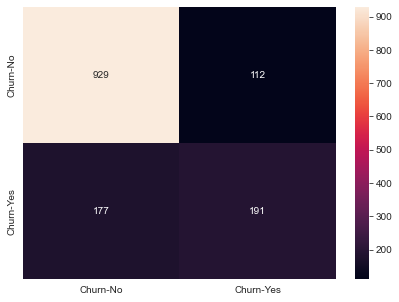

In [112]:
# Classification Accuracy
print('Accuracy on Training data:',model.score(X_train, y_train))
print('Accuracy on Test data:',model.score(X_test, y_test))

# Classification Report
print("Classification Report:\n",classification_report(y_test, model_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, model_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Churn-No","Churn-Yes"]],
                  columns = [i for i in ["Churn-No","Churn-Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

**We do not see much improvement in the model here.**

### Using hyperparameter tuning with Oversampling

In [113]:
# Build the model
model = AdaBoostClassifier(random_state=0)

params = {'n_estimators':list(range(2, 102, 2)), 
          'learning_rate':[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
          'algorithm': ['SAMME', 'SAMME.R']}

gs = RandomizedSearchCV(estimator=model, param_distributions=params, cv=5, verbose=10, n_jobs=2, random_state=0)
gs.fit(X1, y1)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=0), n_jobs=2,
                   param_distributions={'algorithm': ['SAMME', 'SAMME.R'],
                                        'learning_rate': [0.1, 0.2, 0.3, 0.4,
                                                          0.5, 0.6, 0.7, 0.8,
                                                          0.9, 1],
                                        'n_estimators': [2, 4, 6, 8, 10, 12, 14,
                                                         16, 18, 20, 22, 24, 26,
                                                         28, 30, 32, 34, 36, 38,
                                                         40, 42, 44, 46, 48, 50,
                                                         52, 54, 56, 58, 60, ...]},
                   random_state=0, verbose=10)

In [114]:
pd.DataFrame({'param': gs.cv_results_["params"], 
              'score mean': gs.cv_results_["mean_test_score"], 
              'score s.d.': gs.cv_results_["std_test_score"],
             'rank': gs.cv_results_["rank_test_score"]})

param  score mean  score s.d.  \
0  {'n_estimators': 70, 'learning_rate': 0.4, 'al...    0.791315    0.011328   
1  {'n_estimators': 20, 'learning_rate': 0.2, 'al...    0.776919    0.009599   
2  {'n_estimators': 60, 'learning_rate': 0.3, 'al...    0.787444    0.011255   
3  {'n_estimators': 86, 'learning_rate': 0.4, 'al...    0.783936    0.012594   
4  {'n_estimators': 72, 'learning_rate': 0.7, 'al...    0.793615    0.015035   
5  {'n_estimators': 28, 'learning_rate': 0.6, 'al...    0.786356    0.012193   
6  {'n_estimators': 16, 'learning_rate': 0.5, 'al...    0.781153    0.010815   
7  {'n_estimators': 20, 'learning_rate': 0.8, 'al...    0.777403    0.009757   
8  {'n_estimators': 20, 'learning_rate': 0.1, 'al...    0.750426    0.015011   
9  {'n_estimators': 48, 'learning_rate': 0.5, 'al...    0.791074    0.012627   

   rank  
0     2  
1     9  
2     4  
3     6  
4     1  
5     5  
6     7  
7     8  
8    10  
9     3

In [115]:
print('Best Parameters:', gs.best_params_, 'mean score: ', gs.best_score_, sep='\n')

Best Parameters:
{'n_estimators': 72, 'learning_rate': 0.7, 'algorithm': 'SAMME.R'}
mean score: 
0.7936147022269429


In [116]:
# Build the model
model = AdaBoostClassifier(random_state=0, n_estimators=72, learning_rate=0.7, algorithm='SAMME.R')

# Train the model
model.fit(X1, y1)
model_pred = model.predict(X_test)

Accuracy on Training data: 0.7635782747603834
Accuracy on Test data: 0.7508871540099361
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.75      0.82      1041
           1       0.52      0.75      0.61       368

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.75      0.76      1409

Confusion Matrix Chart:


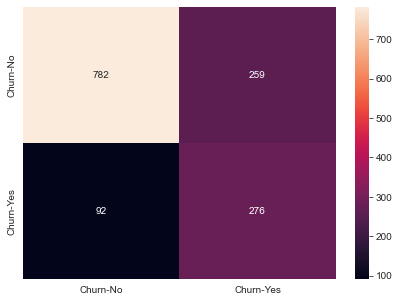

In [117]:
# Classification Accuracy
print('Accuracy on Training data:',model.score(X_train, y_train))
print('Accuracy on Test data:',model.score(X_test, y_test))

# Classification Report
print("Classification Report:\n",classification_report(y_test, model_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, model_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Churn-No","Churn-Yes"]],
                  columns = [i for i in ["Churn-No","Churn-Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

**Evaluation metrics allow us to estimate errors to determine how well our models
are performing:**

> Accuracy: ratio of correct predictions over total predictions.

> Precision: how often the classifier is correct when it predicts positive.

> Recall: how often the classifier is correct for all positive instances.

> F-Score: single measurement to combine precision and recall.

**Performance here is almost same as that of the base model in section 1.3.3.**

## 4. Pickle file for the best performing model


Accuracy on Training data: 0.763400780972666
Accuracy on Test data: 0.7537260468417317

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.76      0.82      1041
           1       0.52      0.75      0.61       368

    accuracy                           0.75      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.80      0.75      0.77      1409

Confusion Matrix Chart:


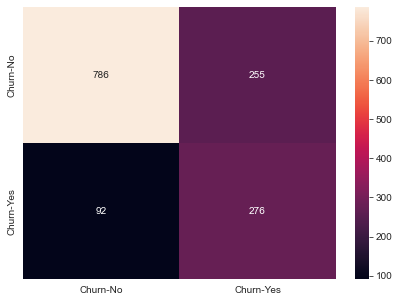

In [118]:
# Final model from the above modeling process: Base Model without Hypertuning

# Build the model
model = AdaBoostClassifier(random_state=0)

# Train the model
model.fit(X1, y1)
model_pred = model.predict(X_test)

# Classification Accuracy
print('')
print('Accuracy on Training data:',model.score(X_train, y_train))
print('Accuracy on Test data:',model.score(X_test, y_test))
print('')

# Classification Report
print("Classification Report:\n",classification_report(y_test, model_pred))

# Confusion Matrix
print("Confusion Matrix Chart:")
cm = confusion_matrix(y_test, model_pred, labels=[0, 1])
df_cm = pd.DataFrame(cm, index = [i for i in ["Churn-No","Churn-Yes"]],
                  columns = [i for i in ["Churn-No","Churn-Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

In [119]:
# Import pickle Package
import pickle

In [120]:
# Save the ML model to a file in the current working directory
Pkl_Filename = "Pickle_AdaBoostClassifier_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)

In [121]:
# Load the ML Model back from the file
with open(Pkl_Filename, 'rb') as file:  
    Pickle_AdaBoostClassifier_Model = pickle.load(file)
    
Pickle_AdaBoostClassifier_Model

AdaBoostClassifier(random_state=0)

# References:

1. [Towards Data Science](https://towardsdatascience.com)
2. [Kaggle. Kaggle Code](https://www.kaggle.com/code)
3. [KdNuggets](https://www.kdnuggets.com/)
4. [AnalyticsVidhya](https://www.analyticsvidhya.com/blog/)
5. [Wikipedia](https://en.wikipedia.org/)
6. [Numpy](https://numpy.org/)
7. [Pandas](https://pandas.pydata.org/)
8. [SciPy](https://scipy.org/)
9. [MatplotLib](https://matplotlib.org/)
10. [Seaborn](https://seaborn.pydata.org/)
11. [Python](https://www.python.org/)
12. [Plotly](https://plotly.com/)
13. [Bokeh](https://docs.bokeh.org/en/latest/)
14. [RStudio](https://www.rstudio.com/)
15. [MiniTab](https://www.minitab.com/en-us/)
16. [Anaconda](https://www.anaconda.com/)